# Dataset Description

In [144]:
# importing libraries for data analysis
import pandas as pd
import numpy as np
# importing libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [146]:
train = pd.read_csv('Training.csv')
match= pd.read_csv('Matches IPL 2020.csv')
past = pd.read_csv('Matches IPL 2008-2019.csv')
test =  pd.read_csv('sample_submission.csv')
train.columns


Index(['Id', 'Runs', 'Boundaries', 'Six', 'Fifty', 'Hundred', 'Duck',
       'Batting_Points', 'Wickets', '4W_Haul', '5W_Haul', 'Maidens',
       'Bowling_Points', 'Total Points'],
      dtype='object')

In [117]:
past.describe()

match_id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

In [118]:
past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
match_id           756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 68.0+ KB


In [119]:
past.isnull().sum()

match_id             0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [120]:
past.shape

(756, 18)

# Data Visualization

## Player of the match

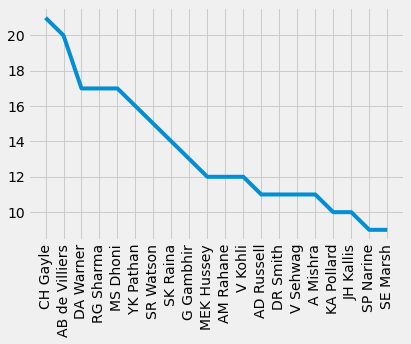

In [121]:
plt.xticks(rotation=90)
plt.plot(past['player_of_match'].value_counts()[:20])


<BarContainer object of 20 artists>

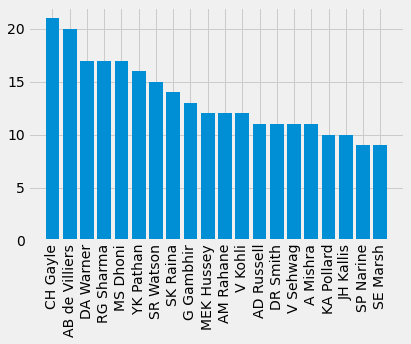

In [122]:
plt.xticks(rotation=90)
plt.bar(past['player_of_match'].value_counts()[:20].keys(),past['player_of_match'].value_counts()[:20])

## How was the match conducted

In [123]:
past['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

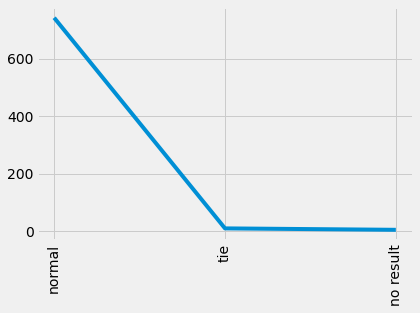

In [124]:
plt.xticks(rotation=90)
plt.plot(past['result'].value_counts())

## Most toss winners

In [125]:
past['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

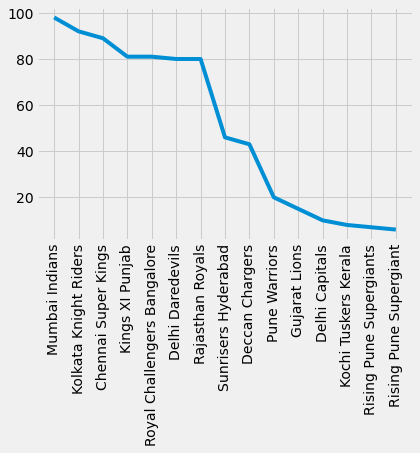

In [126]:
plt.xticks(rotation=90)
plt.plot(past['toss_winner'].value_counts())

<BarContainer object of 15 artists>

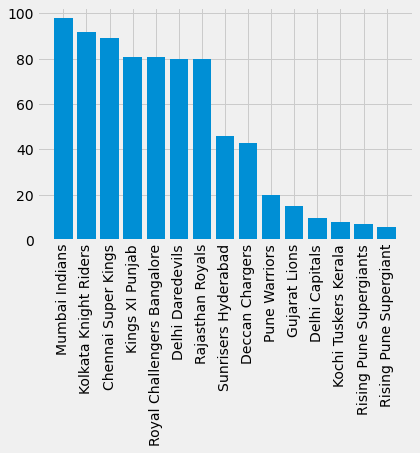

In [127]:
plt.xticks(rotation=90)
plt.bar(past['toss_winner'].value_counts().keys(),past['toss_winner'].value_counts())

## Who won the most matches

In [128]:
past['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

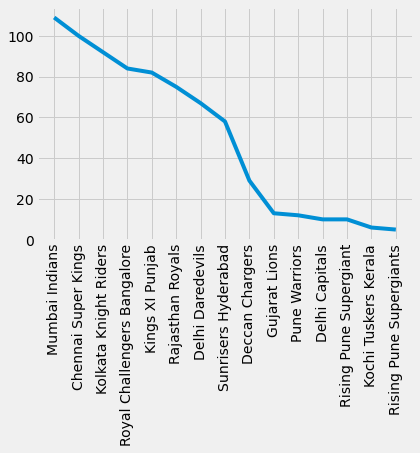

In [235]:
plt.xticks(rotation=90)
plt.plot(past['winner'].value_counts())

<BarContainer object of 15 artists>

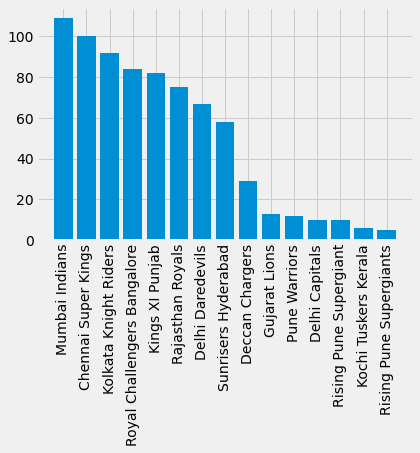

In [237]:
plt.xticks(rotation=90)
plt.bar(past['winner'].value_counts().keys(),past['winner'].value_counts())

## Team batting first wins the match

In [133]:
# team batting first wins the match
bat_first=past[past['win_by_runs']!=0]
bat_first.count()

match_id           337
season             337
city               334
date               337
team1              337
team2              337
toss_winner        337
toss_decision      337
result             337
dl_applied         337
winner             337
win_by_runs        337
win_by_wickets     337
player_of_match    337
venue              337
umpire1            336
umpire2            336
umpire3             50
dtype: int64

Text(0.5, 1.0, 'Distribution of runs')

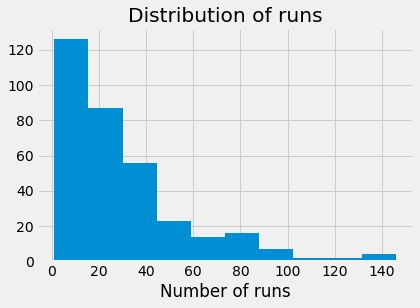

In [134]:
# making histogram for numerical column
plt.hist(bat_first['win_by_runs'])
plt.xlabel('Number of runs')
plt.title('Distribution of runs')

In [135]:
bat_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

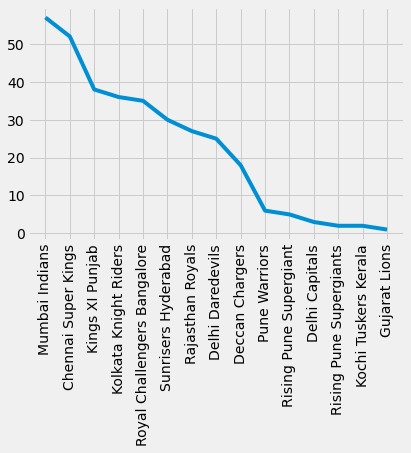

In [136]:
plt.xticks(rotation=90)
plt.plot(bat_first['winner'].value_counts())


<BarContainer object of 15 artists>

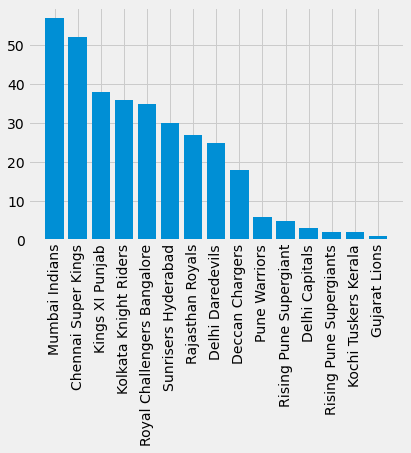

In [137]:
plt.xticks(rotation=90)
plt.bar(bat_first['winner'].value_counts().keys(),bat_first['winner'].value_counts())


([<matplotlib.patches.Wedge at 0x17919310>,
 [Text(0.9483265621806172, 0.5573838277728304, 'Mumbai Indians'),
  Text(0.02563386044208945, 1.0997012799841763, 'Chennai Super Kings'),
  Text(-0.8010226010255528, 0.7538983967659425, 'Kings XI Punjab'),
  Text(-1.0976587644223588, 0.07173030661290015, 'Kolkata Knight Riders'),
  Text(-0.9099615286095598, -0.6180372290166294, 'Royal Challengers Bangalore'),
  Text(-0.3959592959126898, -1.0262632391254825, 'Sunrisers Hyderabad'),
  Text(0.1786580387418249, -1.08539453895481, 'Rajasthan Royals'),
  Text(0.6638604303770628, -0.8770914028649359, 'Delhi Daredevils'),
  Text(0.9534813337914305, -0.5485192303933517, 'Deccan Chargers'),
  Text(1.0514175368316108, -0.32329732947079654, 'Pune Warriors'),
  Text(1.0789886618399935, -0.21397071673651988, 'Rising Pune Supergiant'),
  Text(1.0919321532371848, -0.1329818511181329, 'Delhi Capitals'),
  Text(1.0969423967462106, -0.08195961335120551, 'Rising Pune Supergiants'),
  Text(1.099235333706967, -0.0

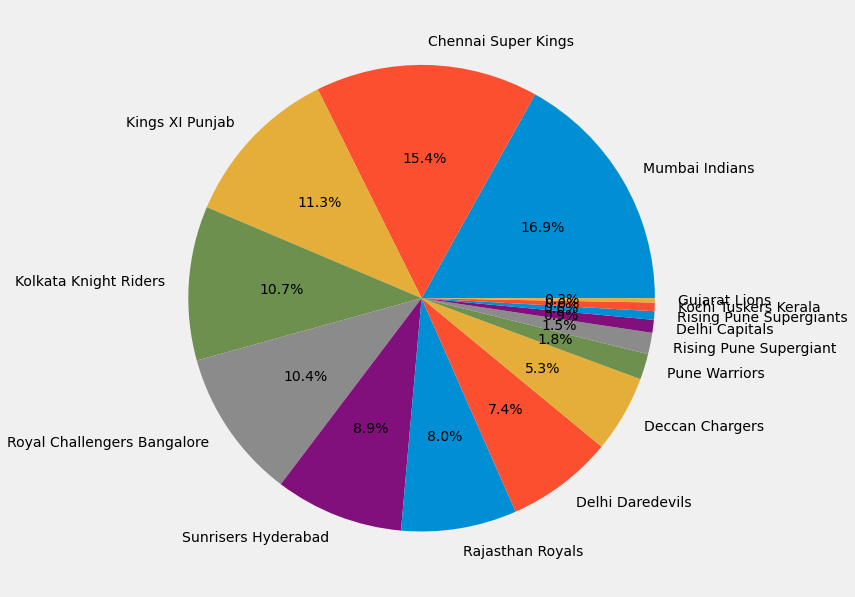

In [138]:
plt.figure(figsize=(10,10))
plt.pie(list(bat_first['winner'].value_counts()),labels=list(bat_first['winner'].value_counts().keys()),autopct='%0.1f%%')

## Team batting second wins the match

In [139]:
# team batting second wins the match
bat_second=past[past['win_by_wickets']!=0]
bat_second.count()

match_id           406
season             406
city               402
date               406
team1              406
team2              406
toss_winner        406
toss_decision      406
result             406
dl_applied         406
winner             406
win_by_runs        406
win_by_wickets     406
player_of_match    406
venue              406
umpire1            405
umpire2            405
umpire3             66
dtype: int64

Text(0.5, 1.0, 'Distribution of wickets')

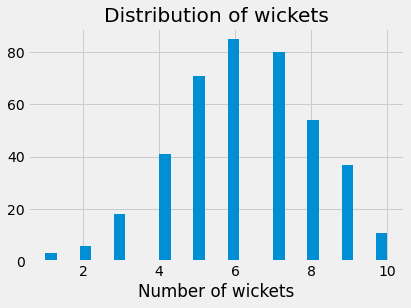

In [140]:
# making histogram for numerical column
plt.hist(bat_second['win_by_wickets'],bins=30)
plt.xlabel('Number of wickets')
plt.title('Distribution of wickets')

In [141]:
bat_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

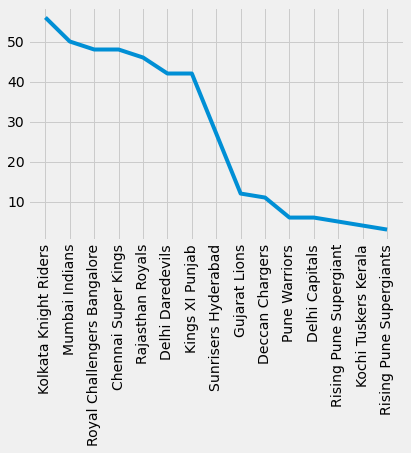

In [142]:
plt.xticks(rotation=90)
plt.plot(bat_second['winner'].value_counts())

<BarContainer object of 15 artists>

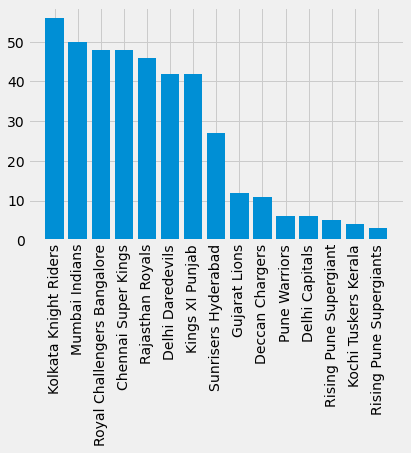

In [143]:
plt.xticks(rotation=90)
plt.bar(bat_second['winner'].value_counts().keys(),bat_second['winner'].value_counts())


([<matplotlib.patches.Wedge at 0x17b4c170>,
 [Text(0.9983329623836416, 0.4618780101047276, 'Kolkata Knight Riders'),
  Text(0.34315510477407346, 1.0451050540818827, 'Mumbai Indians'),
  Text(-0.469589129872304, 0.994729133536247, 'Royal Challengers Bangalore'),
  Text(-1.0186933326018242, 0.415046857731256, 'Chennai Super Kings'),
  Text(-1.0368582653410094, -0.3673213002182603, 'Rajasthan Royals'),
  Text(-0.5743854605141011, -0.9381265067942618, 'Delhi Daredevils'),
  Text(0.1104657133114124, -1.094439274780744, 'Kings XI Punjab'),
  Text(0.6520603064504145, -0.8858991797895468, 'Sunrisers Hyderabad'),
  Text(0.8858992637336905, -0.6520601924025918, 'Gujarat Lions'),
  Text(0.987343061874614, -0.48492646676384094, 'Deccan Chargers'),
  Text(1.0424185113345334, -0.3512316147887253, 'Pune Warriors'),
  Text(1.0704946012627996, -0.2530638430657369, 'Delhi Capitals'),
  Text(1.0881331687620566, -0.16114033337388253, 'Rising Pune Supergiant'),
  Text(1.096708506966301, -0.0850320571769680

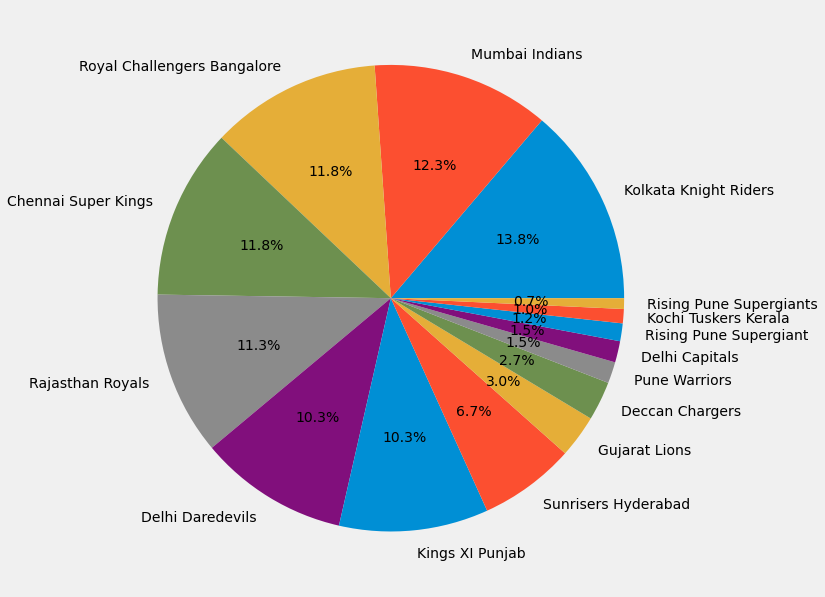

In [144]:
plt.figure(figsize=(10,10))
plt.pie(list(bat_second['winner'].value_counts()),labels=list(bat_second['winner'].value_counts().keys()),autopct='%0.1f%%')

## Matches won by teams in different years

In [146]:
past1=past[past['season']==2019]

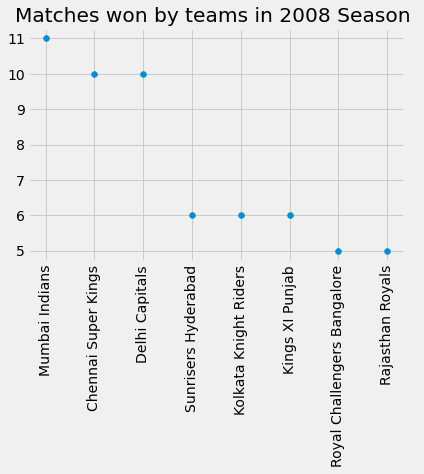

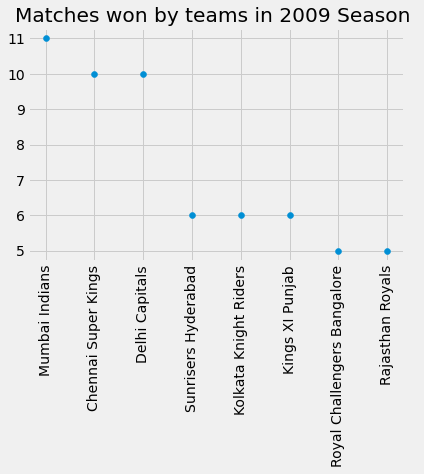

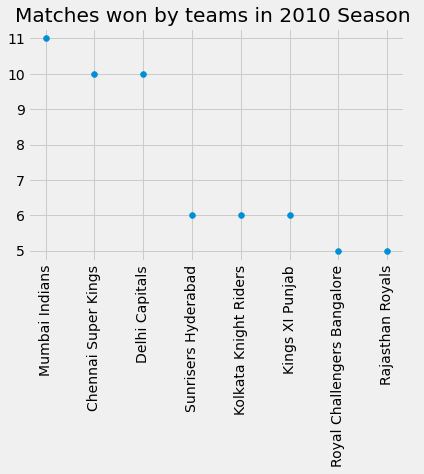

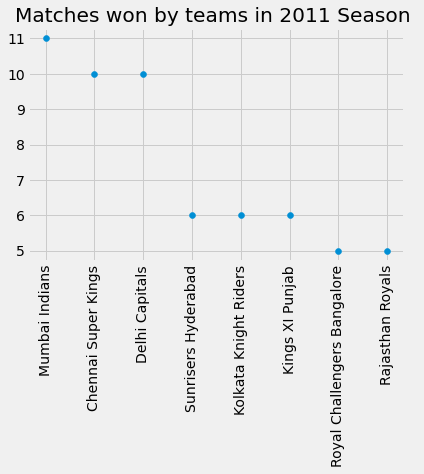

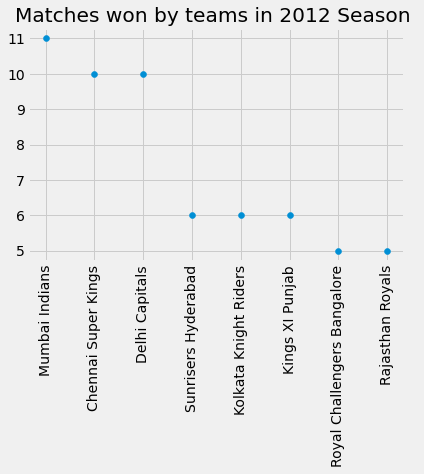

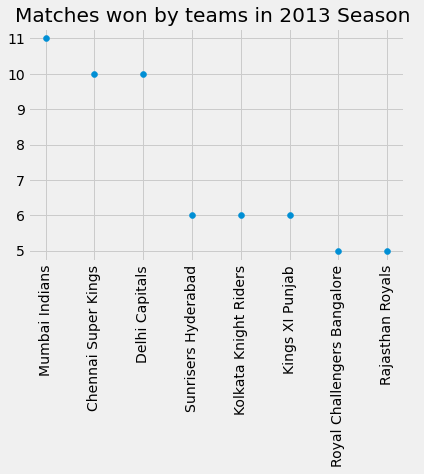

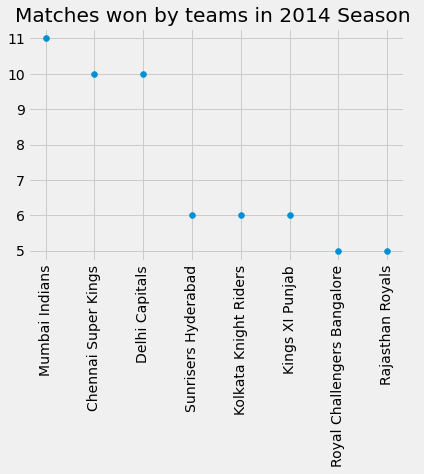

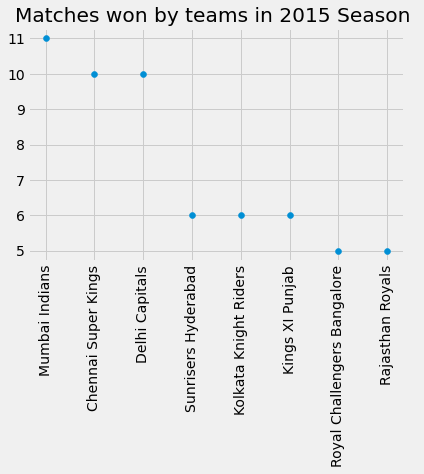

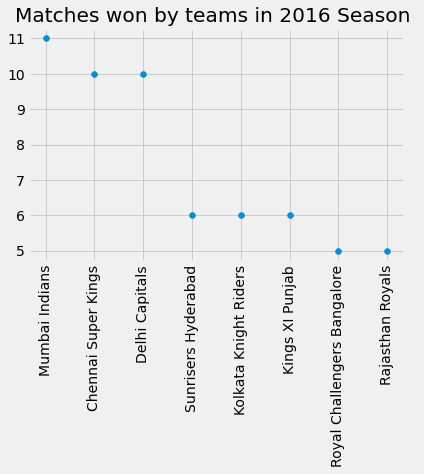

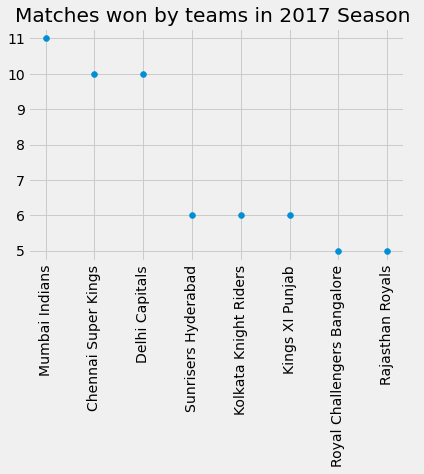

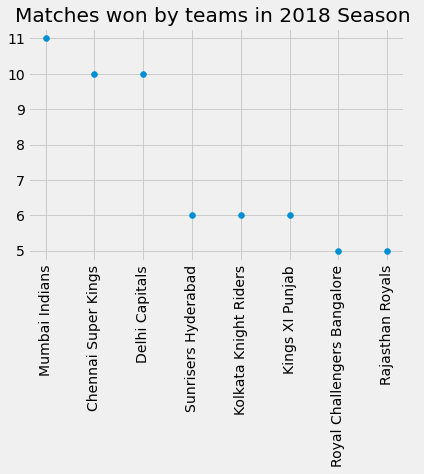

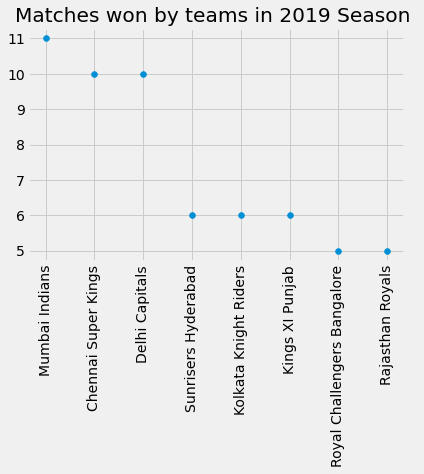

In [243]:
for x in range(2008, 2020, 1):
#     plt.figure(figsize=(10,10))
    plt.xticks(rotation=90)
    plt.scatter(past1['winner'].value_counts().keys(),past1['winner'].value_counts())
    plt.title(f'Matches won by teams in {x} Season ')
    plt.show()
    x+=1

## Most played Venue

In [149]:
past['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

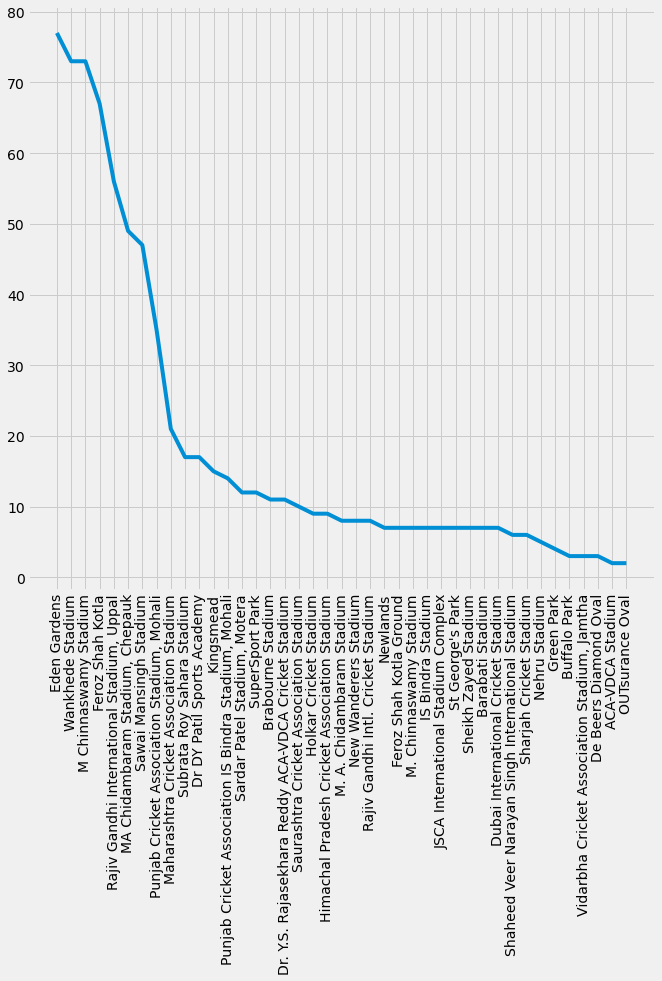

In [151]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.plot(past['venue'].value_counts())

Text(0.5, 0, 'Stadium')

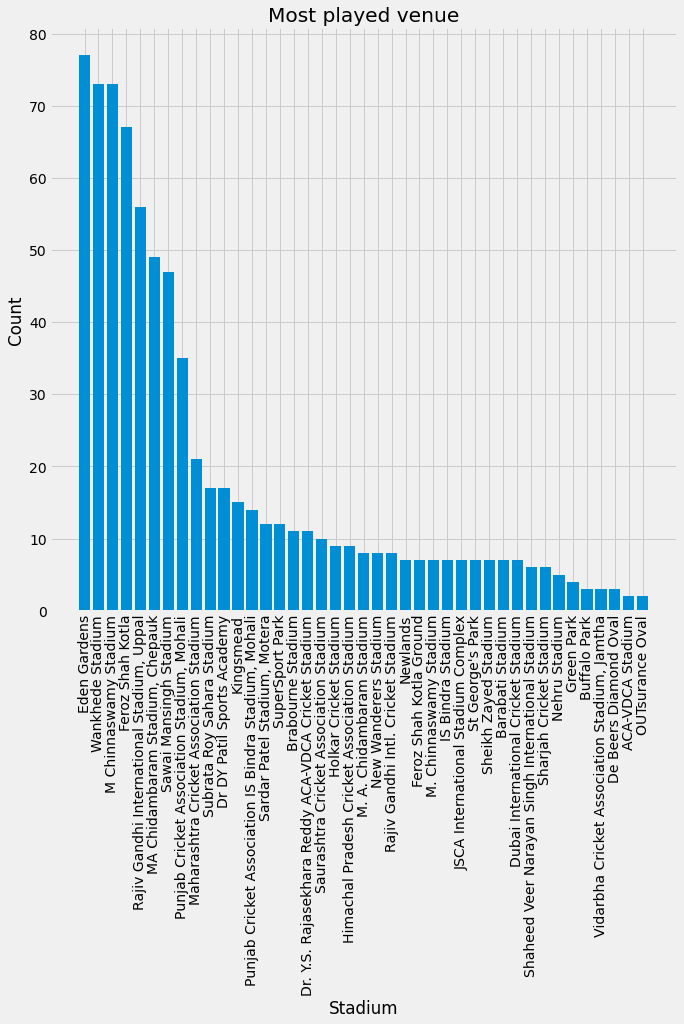

In [157]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.bar(past['venue'].value_counts().keys(),past['venue'].value_counts())
plt.title('Most played venue')
plt.ylabel('Count')
plt.xlabel('Stadium')

## Most played city

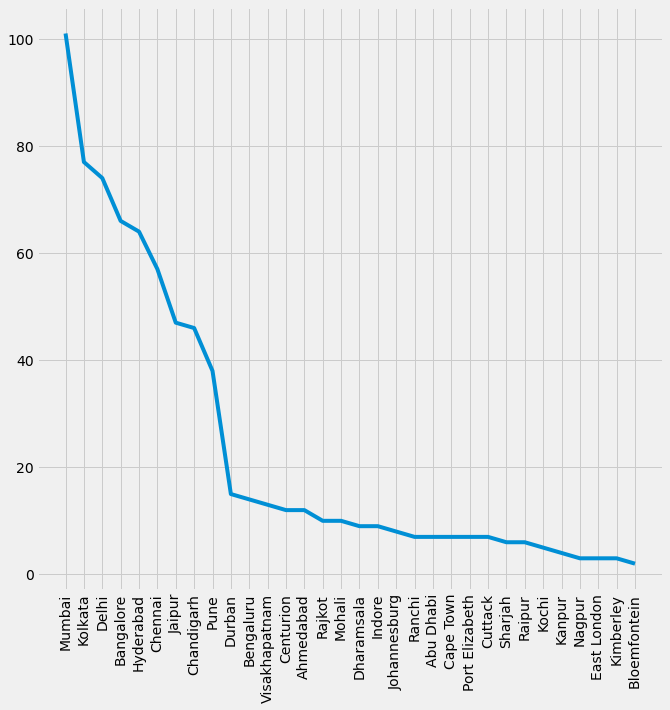

In [232]:
past['city'].value_counts()
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.plot(past['city'].value_counts())

Text(0.5, 0, 'city')

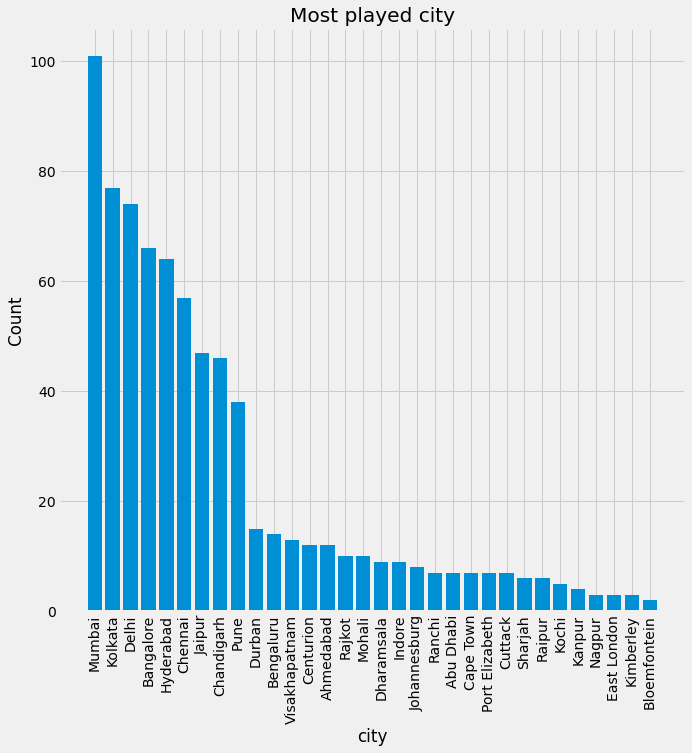

In [233]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.bar(past['city'].value_counts().keys(),past['city'].value_counts())
plt.title('Most played city')
plt.ylabel('Count')
plt.xlabel('city')

## Favorite umpire

Text(0.5, 0, 'Name of the Umpire')

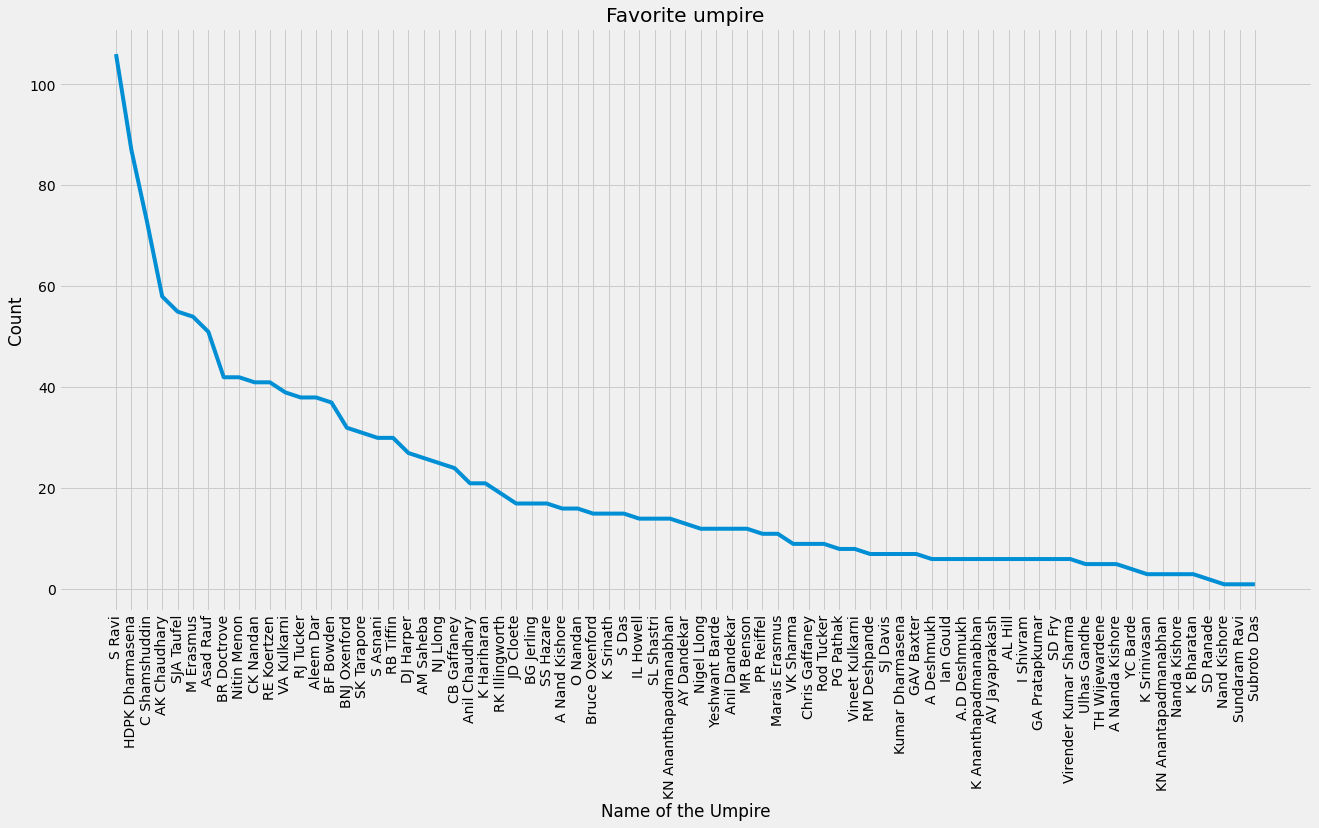

In [163]:
plt.figure(figsize=(20,10))
temp=pd.concat([past['umpire1'],past['umpire2']]).value_counts().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.plot(temp.index,temp.values)
plt.title('Favorite umpire')
plt.ylabel('Count')
plt.xlabel('Name of the Umpire')

Text(0.5, 0, 'Name of the Umpire')

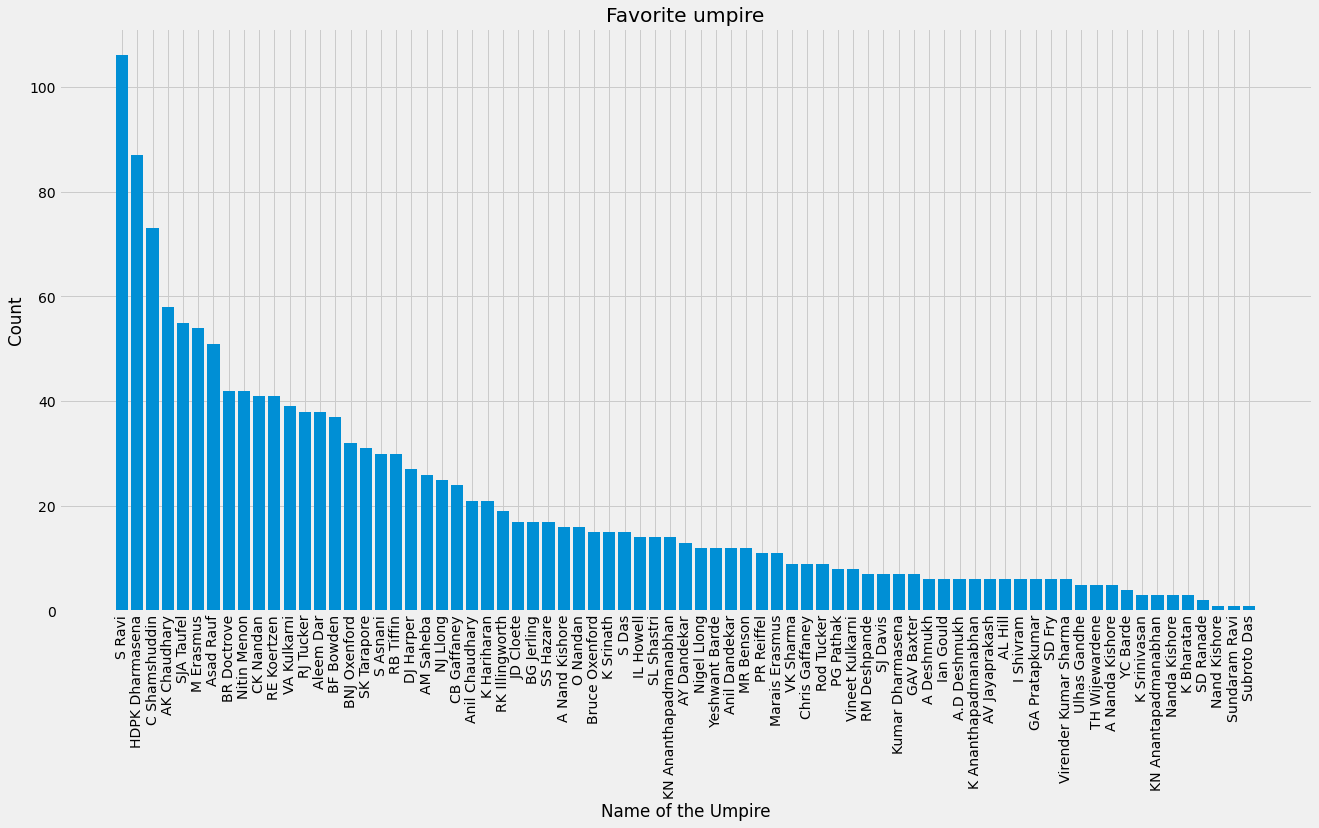

In [162]:
plt.figure(figsize=(20,10))
temp=pd.concat([past['umpire1'],past['umpire2']]).value_counts().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(temp.index,temp.values)
plt.title('Favorite umpire')
plt.ylabel('Count')
plt.xlabel('Name of the Umpire')

## Stadium-wise analysis

Text(0.5, 1.0, 'Feroz Shah Kotla')

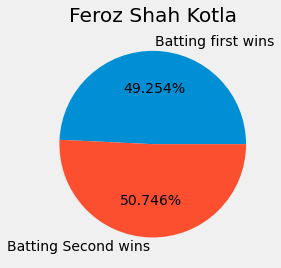

In [166]:
stadium1=past[past['venue']=='Feroz Shah Kotla']
stadium1_win=stadium1[stadium1['win_by_runs']!=0]
slices=[len(stadium1_win),len(stadium1)-len(stadium1_win)]
labels=['Batting first wins','Batting Second wins']
plt.pie(slices,labels=labels,autopct='%2.3f%%')
plt.title('Feroz Shah Kotla')

Text(0.5, 1.0, 'Eden Gardens')

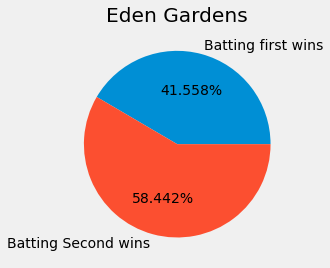

In [167]:
stadium1=past[past['venue']=='Eden Gardens']
stadium1_win=stadium1[stadium1['win_by_runs']!=0]
slices=[len(stadium1_win),len(stadium1)-len(stadium1_win)]
labels=['Batting first wins','Batting Second wins']
plt.pie(slices,labels=labels,autopct='%2.3f%%')
plt.title('Eden Gardens')

Text(0.5, 1.0, 'Wankhede Stadium')

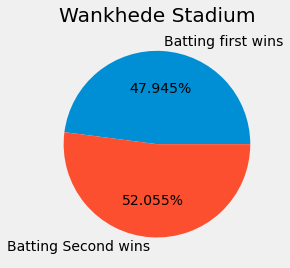

In [168]:
stadium1=past[past['venue']=='Wankhede Stadium']
stadium1_win=stadium1[stadium1['win_by_runs']!=0]
slices=[len(stadium1_win),len(stadium1)-len(stadium1_win)]
labels=['Batting first wins','Batting Second wins']
plt.pie(slices,labels=labels,autopct='%2.3f%%')
plt.title('Wankhede Stadium')

Text(0.5, 1.0, 'Rajiv Gandhi International Stadium, Uppal')

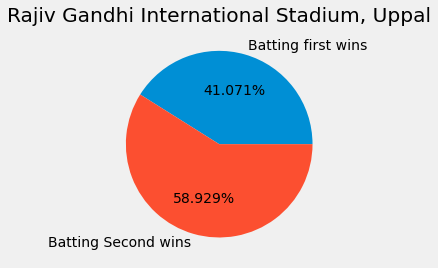

In [169]:
# Rajiv Gandhi International Stadium, Uppal
stadium1=past[past['venue']=='Rajiv Gandhi International Stadium, Uppal']
stadium1_win=stadium1[stadium1['win_by_runs']!=0]
slices=[len(stadium1_win),len(stadium1)-len(stadium1_win)]
labels=['Batting first wins','Batting Second wins']
plt.pie(slices,labels=labels,autopct='%2.3f%%')
plt.title('Rajiv Gandhi International Stadium, Uppal')

## Matches won/lost by teams winning toss in different years

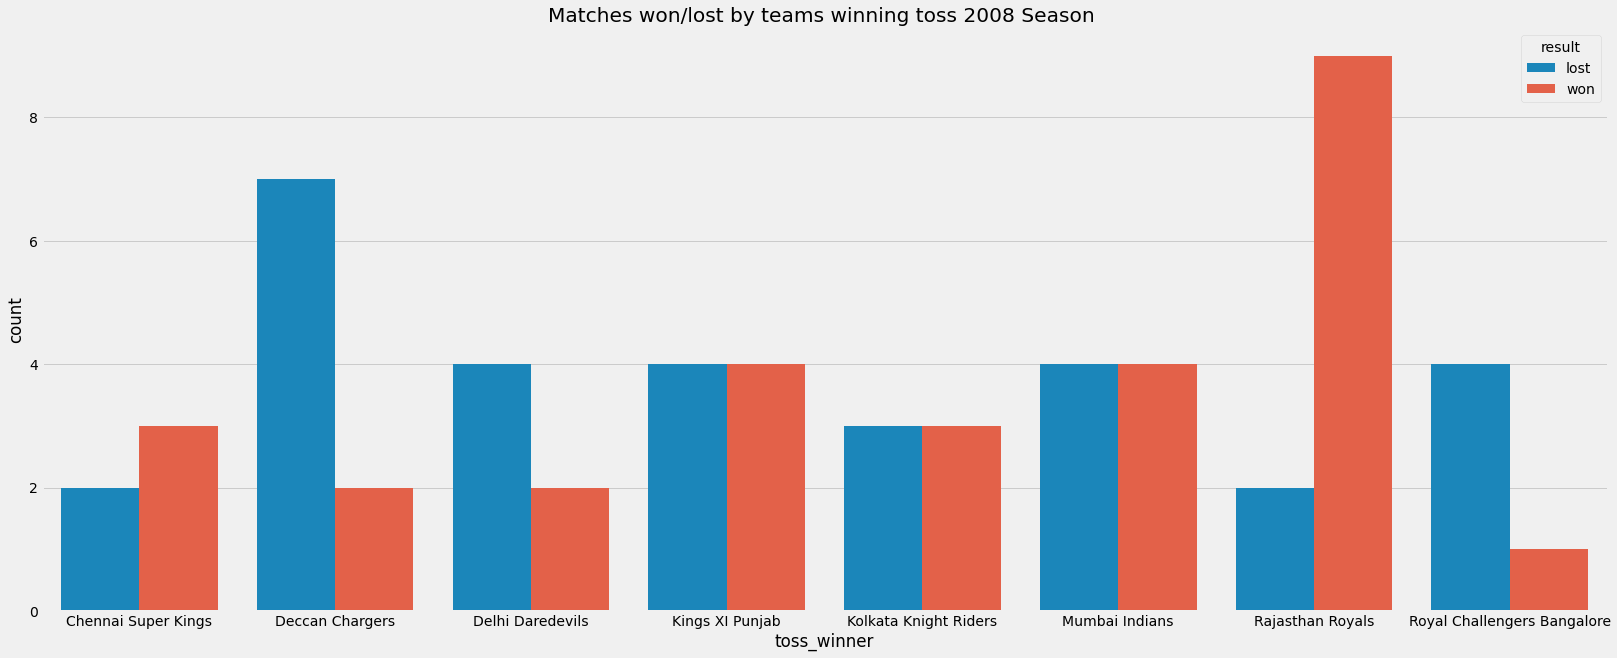

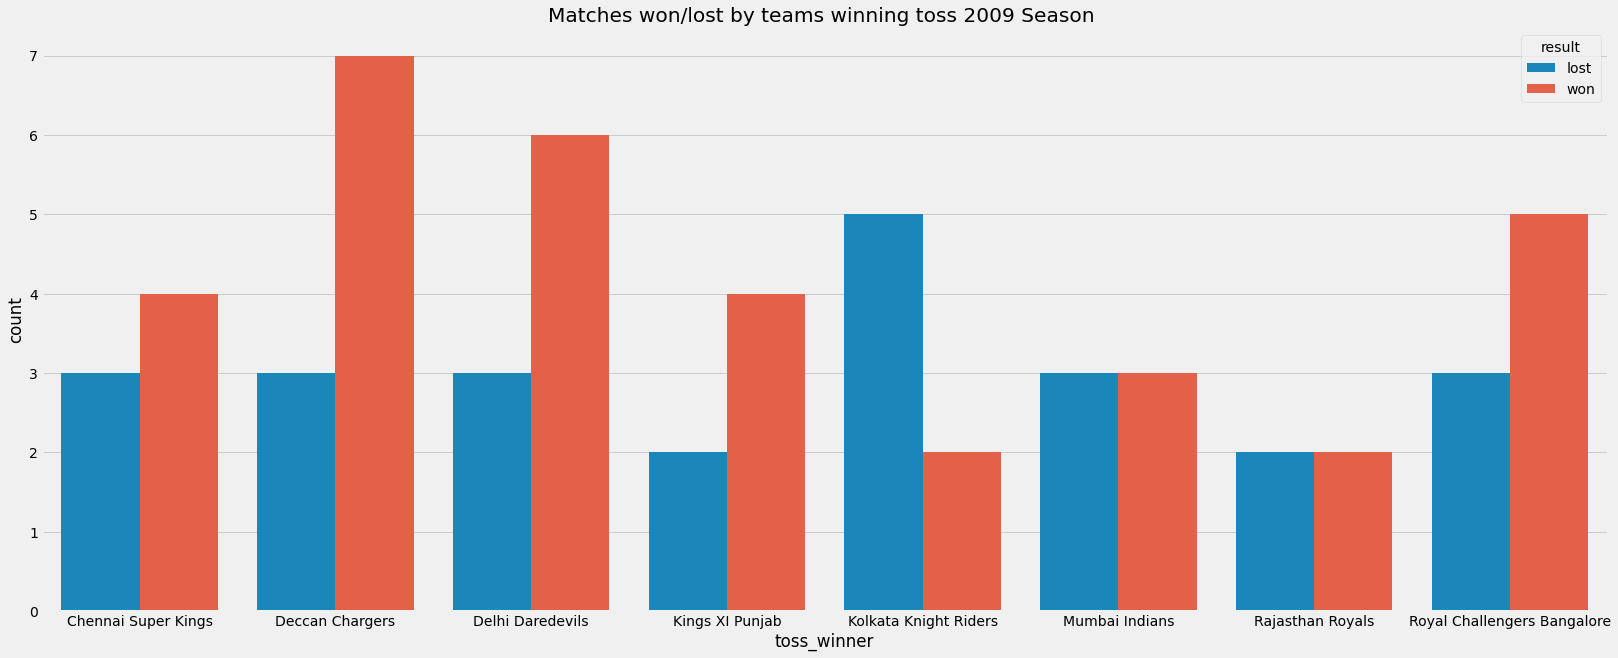

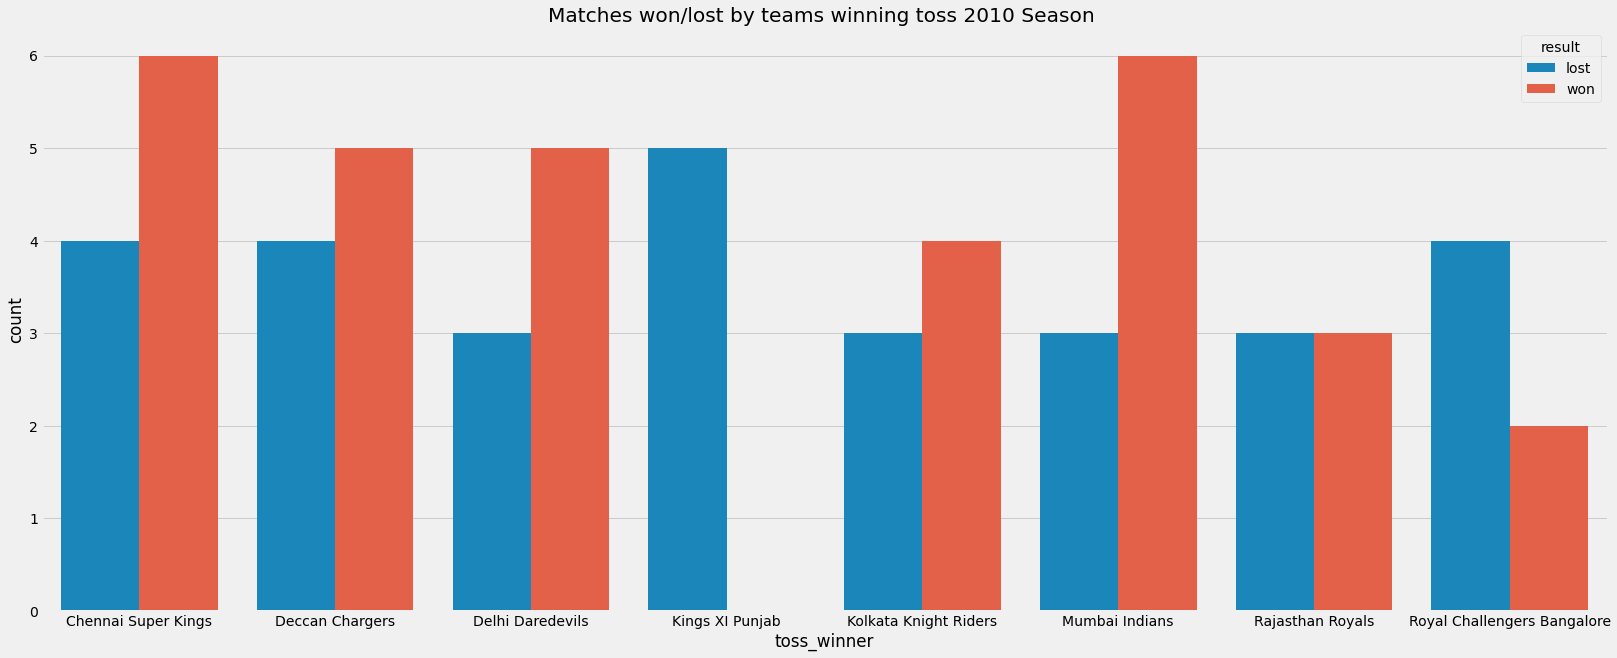

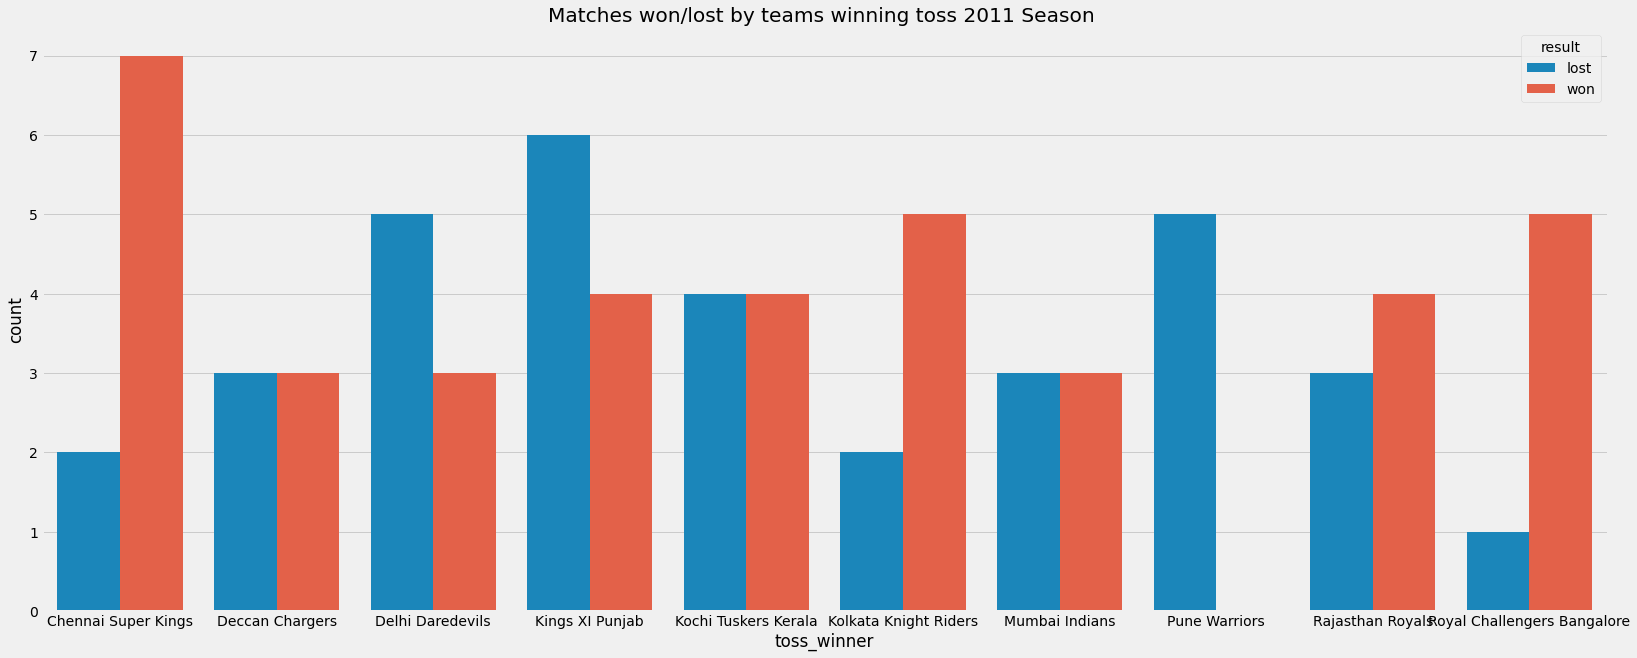

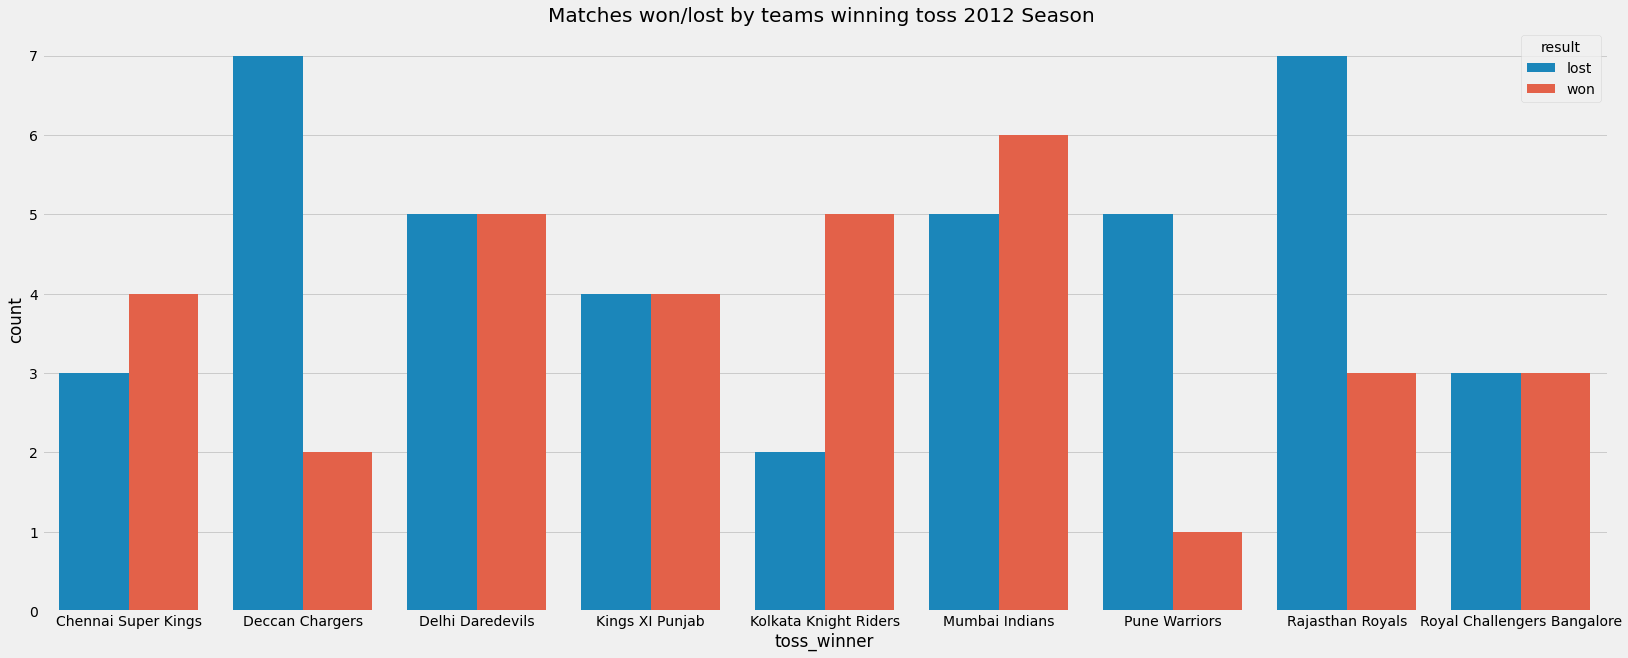

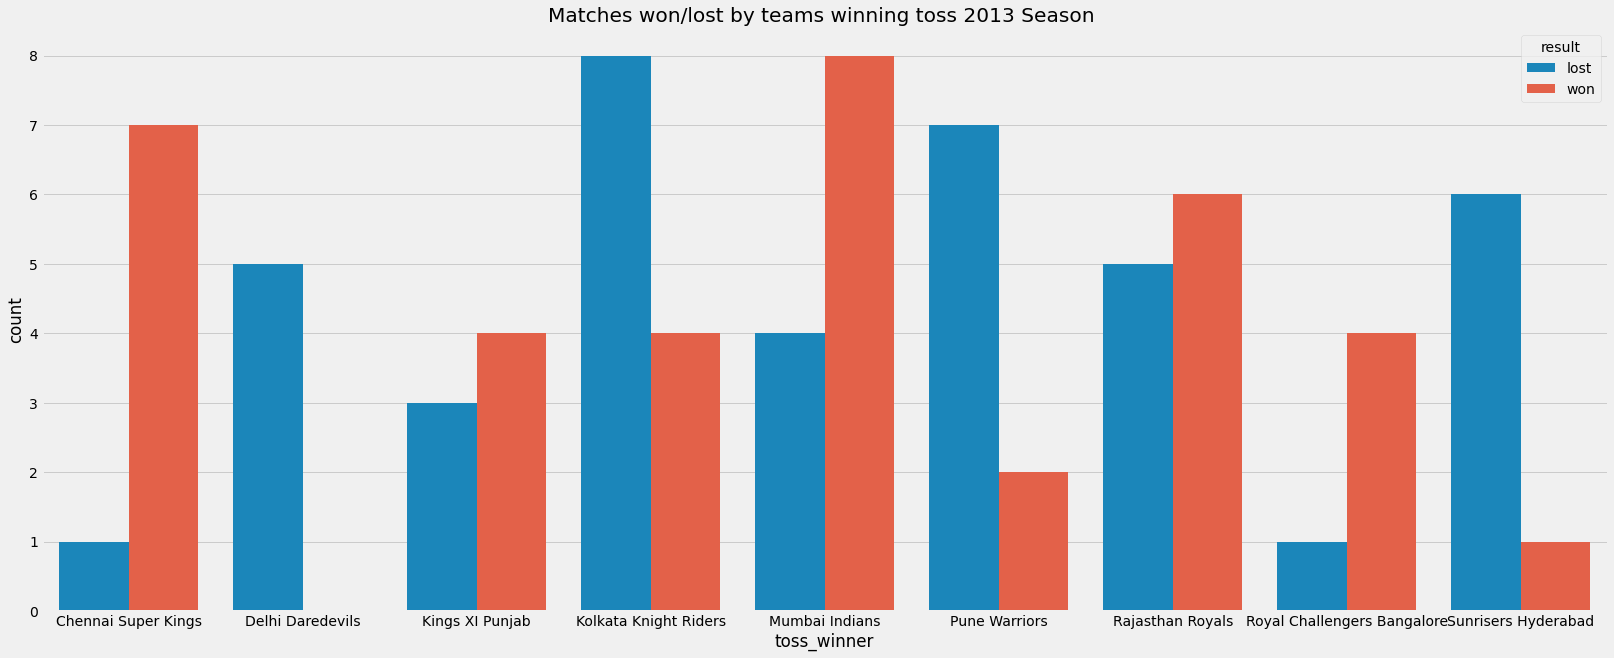

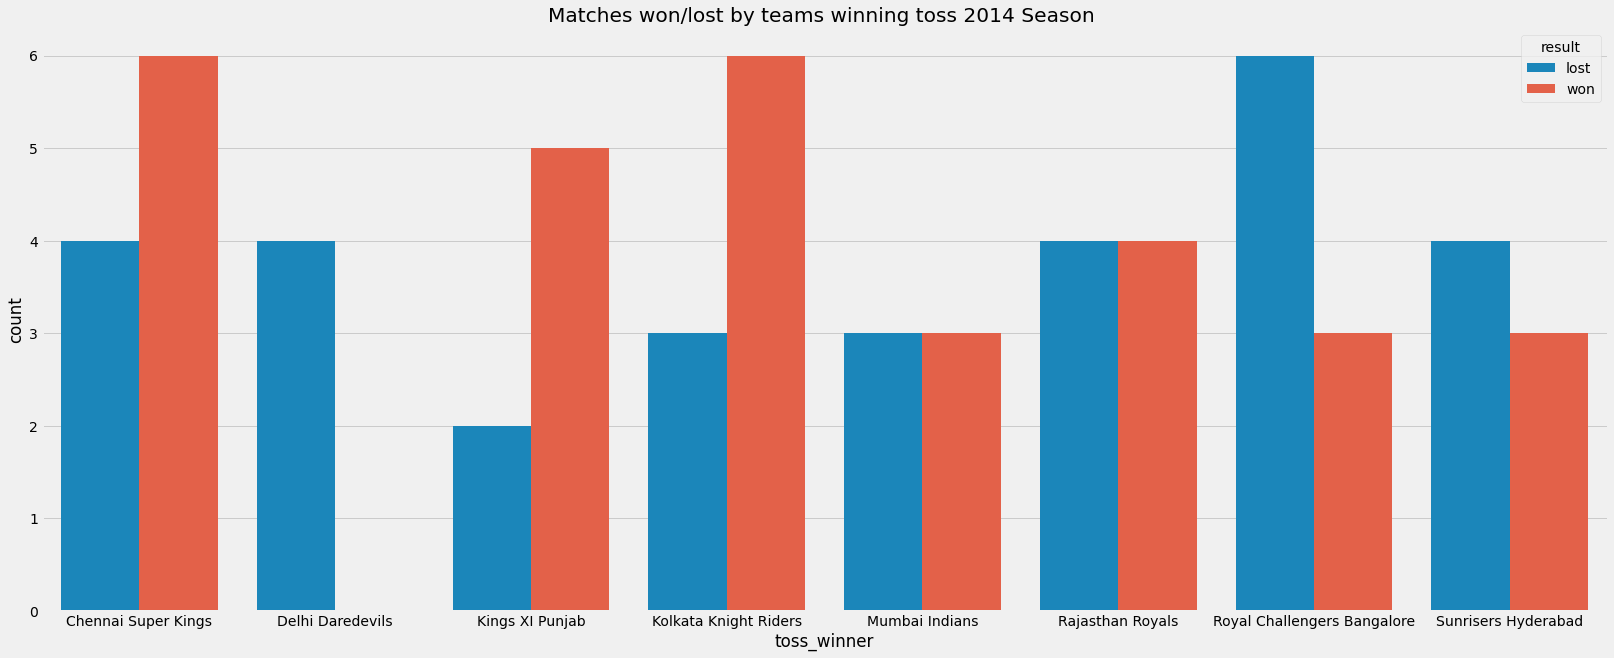

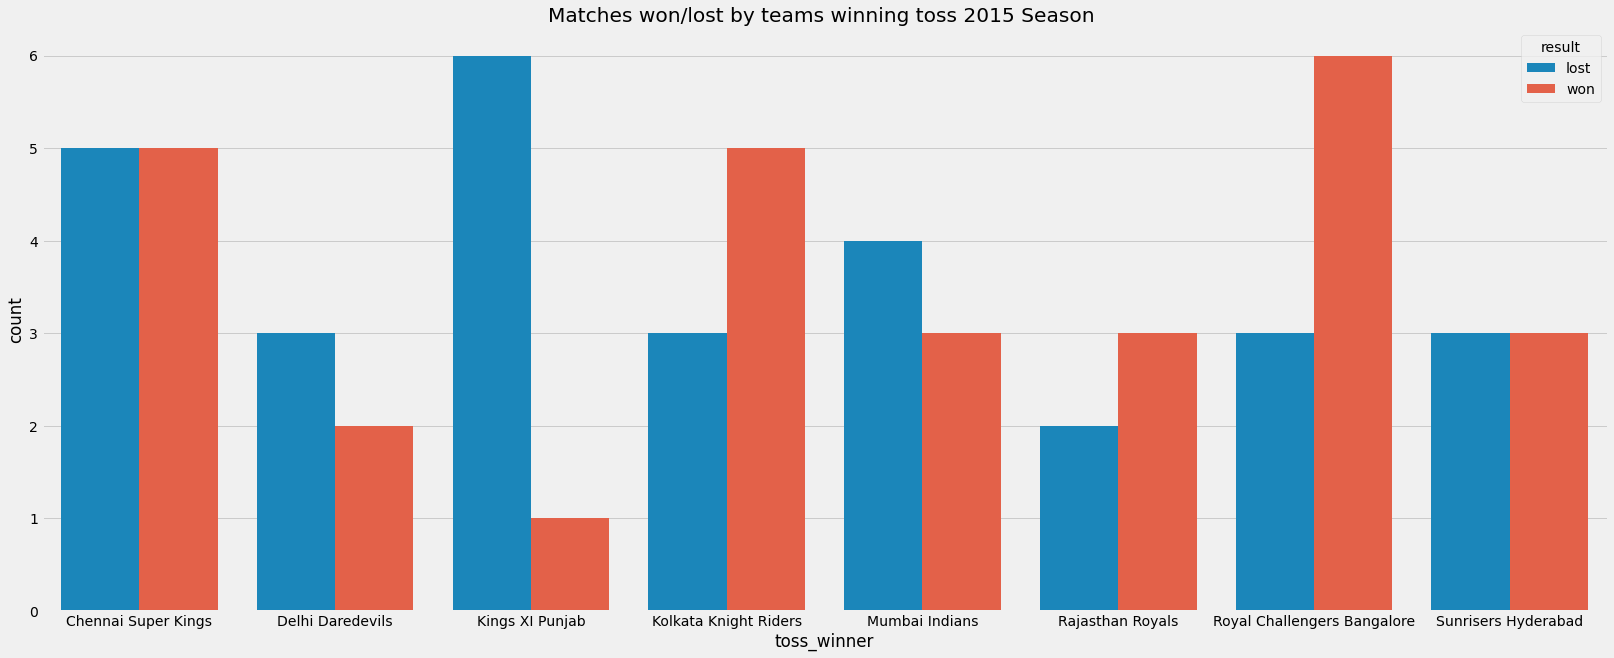

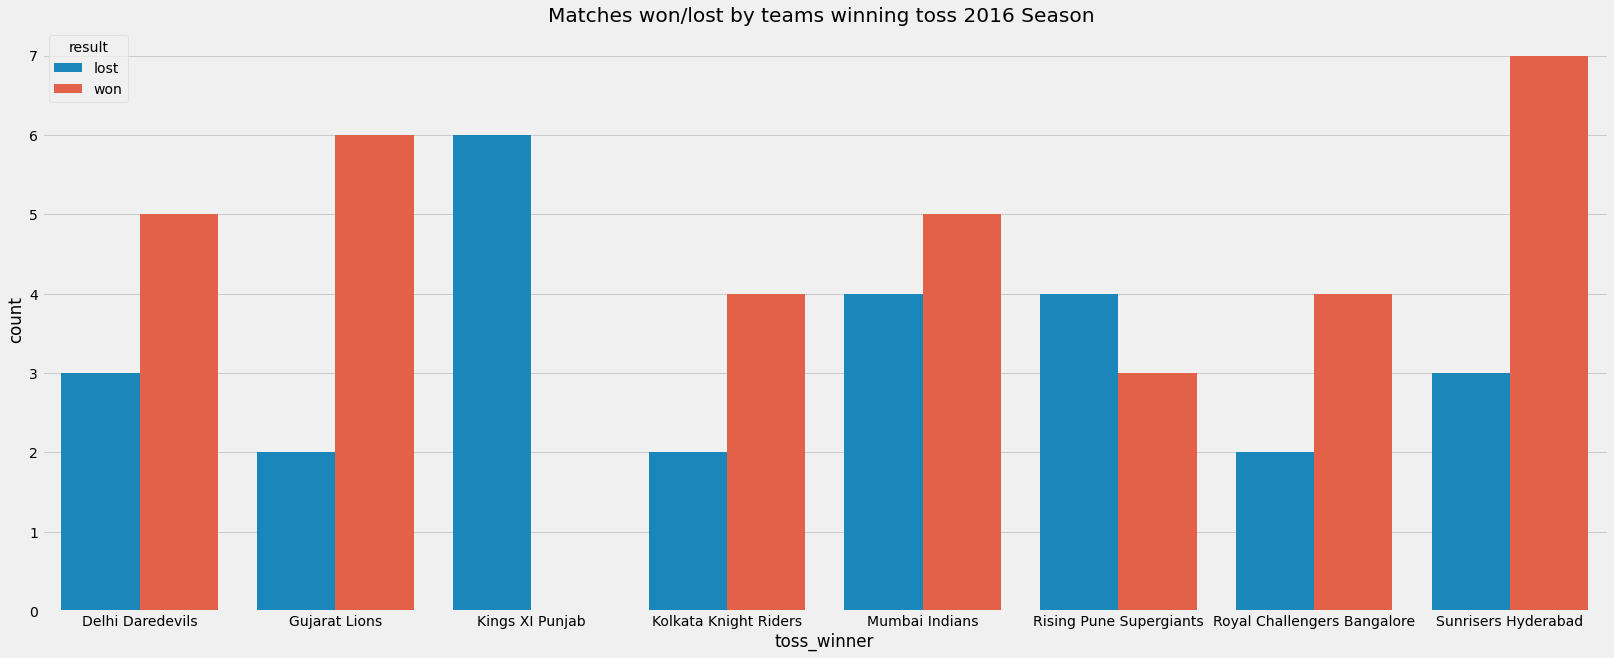

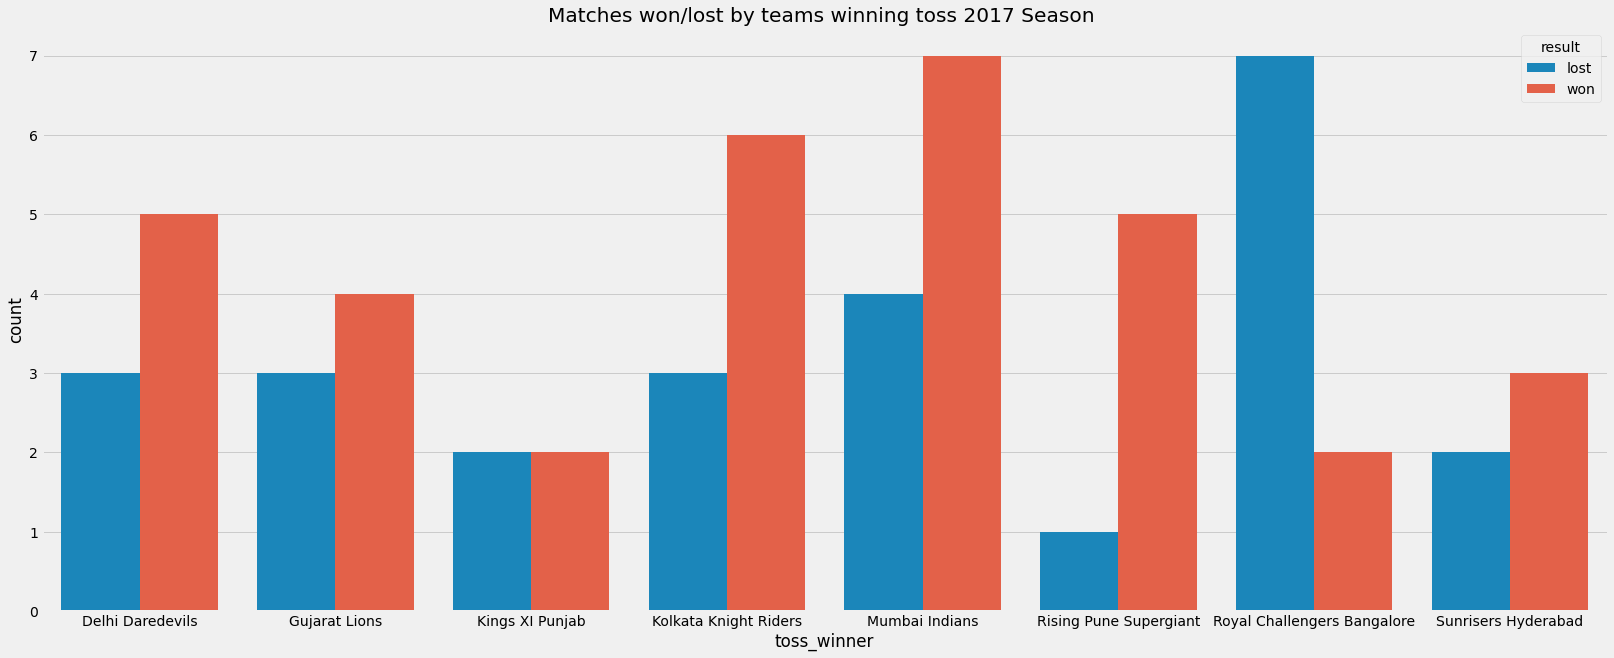

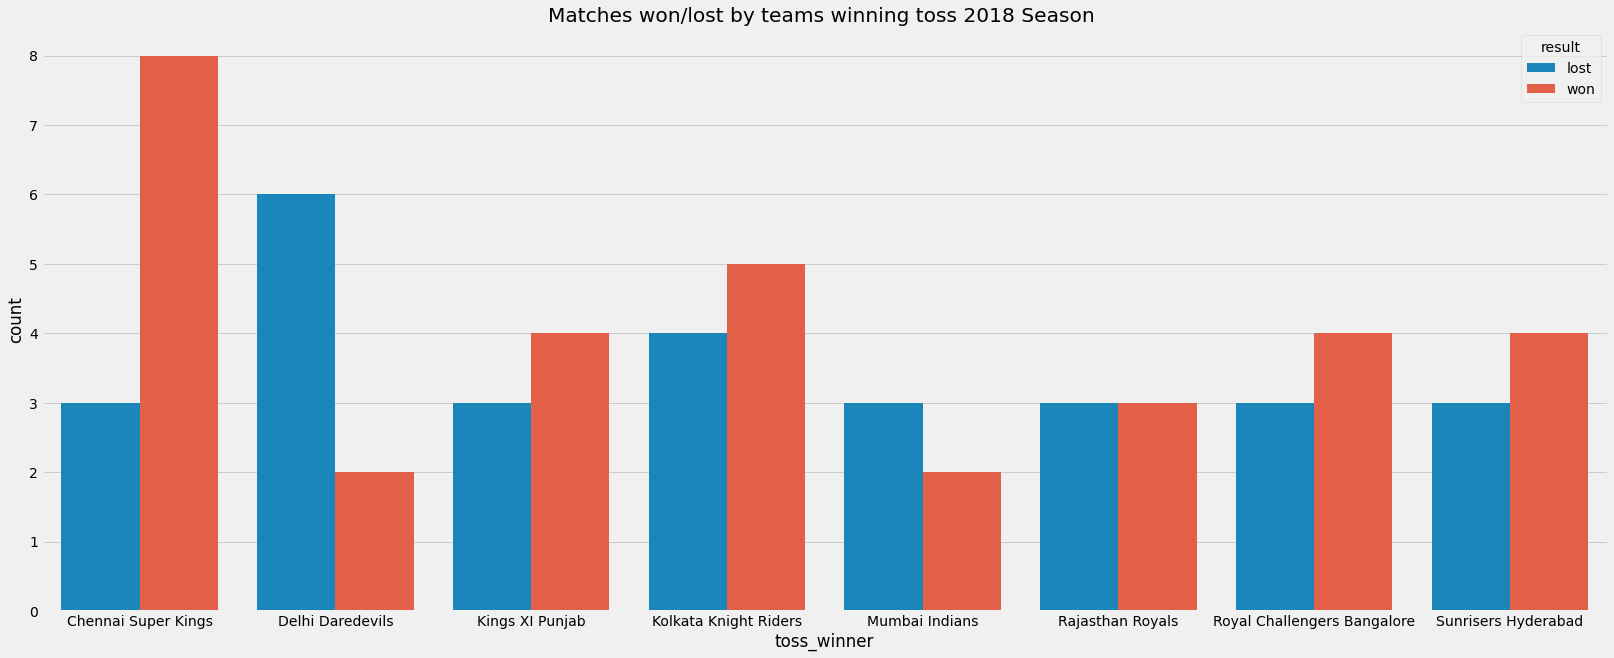

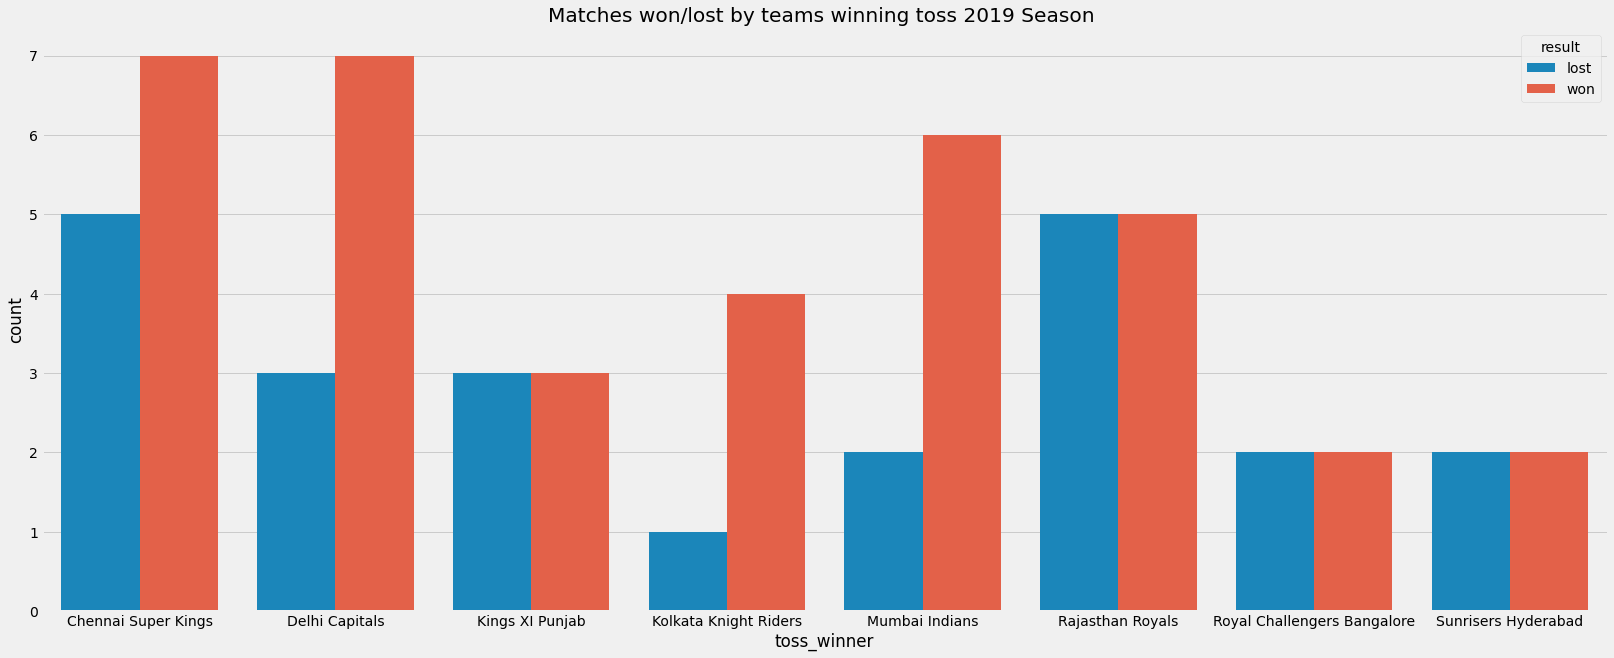

In [221]:
toss = past.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')

toss['result'] = np.where(toss['toss_winner'] == toss['winner'], 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()
for x in range(2008, 2020, 1):
    plt.figure(figsize=(25,10))
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title(f'Matches won/lost by teams winning toss {x} Season ')
#     plot.set_xticklabels('toss_winner',rotation=30)
    plt.show()
    x+=1

In [295]:
train["Match_ID"]=df_train["Id"].str.split("_", n = 1, expand = True)[0]
train["Players"]=df_train["Id"].str.split("_", n = 1, expand = True)[1]
train.head()

Id  Runs  Boundaries  Six  Fifty  Hundred  Duck  \
0   1_Bipul Sharma     0           0    0      0        0     0   
1       1_DJ Hooda    16           1    1      0        0     0   
2      1_KM Jadhav    31           5    1      0        0     0   
3  1_Mandeep Singh    24           5    0      0        0     0   
4   1_Yuvraj Singh    62          10    3      1        0     0   

   Batting_Points  Wickets  4W_Haul  5W_Haul  Maidens  Bowling_Points  \
0               0        1        0        0        0              25   
1              19        1        0        0        0              25   
2              38        0        0        0        0               0   
3              29        0        0        0        0               0   
4              86        0        0        0        0               0   

   Total Points Match_ID        Players  
0            25        1   Bipul Sharma  
1            44        1       DJ Hooda  
2            38        1      KM Jadhav  
3            29        1  Mandeep Singh  
4            86        1   Yuvraj Singh

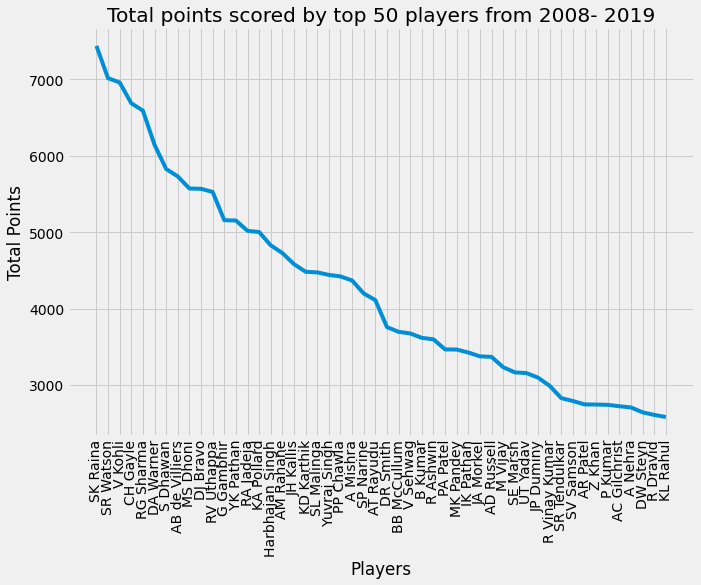

In [296]:
train1=train.groupby('Players').agg({'Total Points':np.sum}).sort_values('Total Points',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Total Points')
plt.title('Total points scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

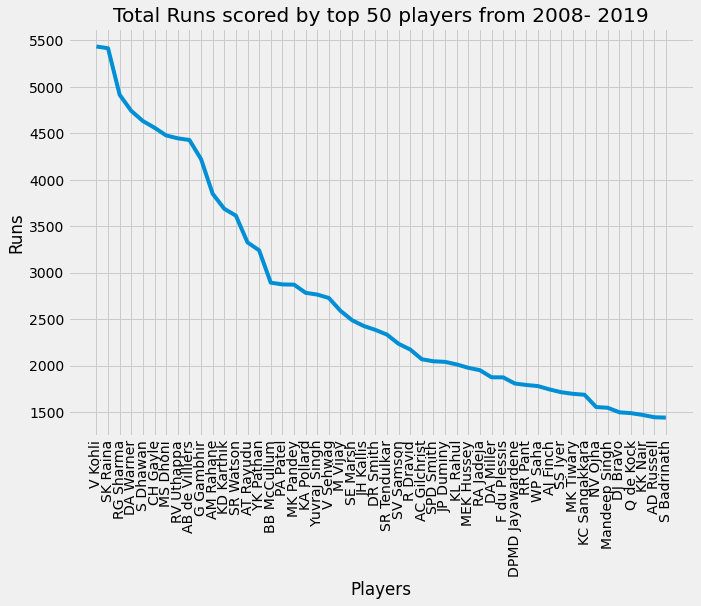

In [303]:
train1=train.groupby('Players').agg({'Runs':np.sum}).sort_values('Runs',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Runs')
plt.title('Total Runs scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

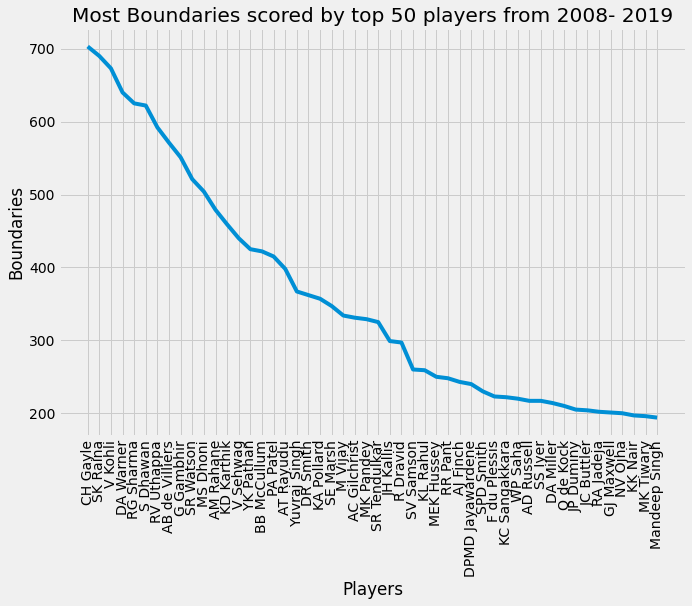

In [304]:
train1=train.groupby('Players').agg({'Boundaries':np.sum}).sort_values('Boundaries',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Boundaries')
plt.title('Most Boundaries scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

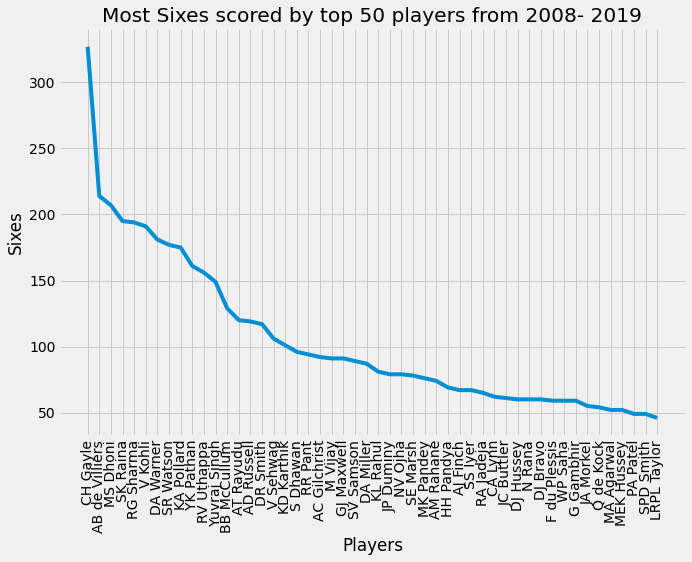

In [305]:
train1=train.groupby('Players').agg({'Six':np.sum}).sort_values('Six',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Sixes')
plt.title('Most Sixes scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

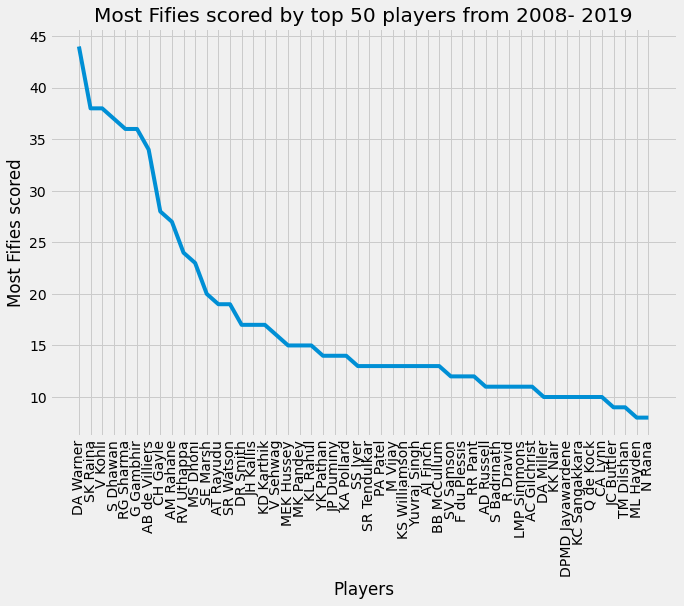

In [306]:
train1=train.groupby('Players').agg({'Fifty':np.sum}).sort_values('Fifty',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Most Fifies scored')
plt.title('Most Fifies scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

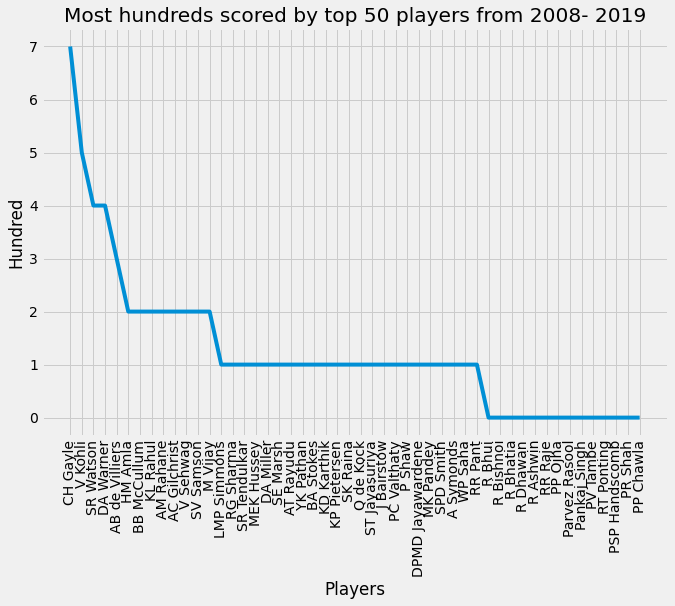

In [307]:
train1=train.groupby('Players').agg({'Hundred':np.sum}).sort_values('Hundred',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Hundred')
plt.title('Most hundreds scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

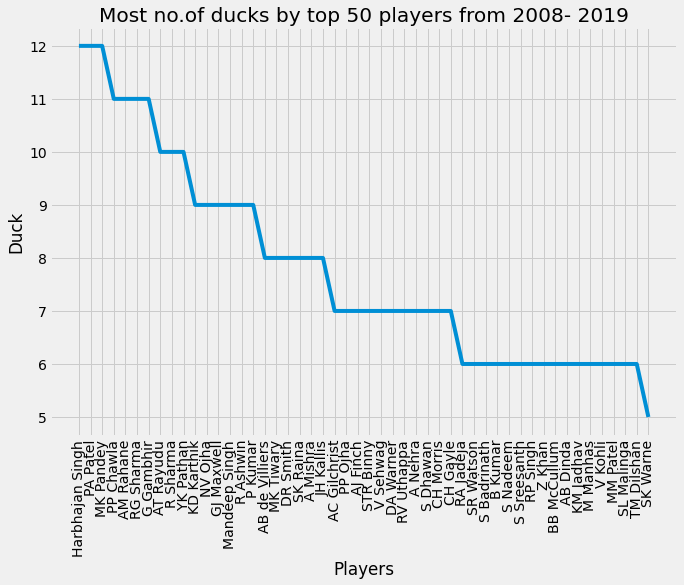

In [308]:
train1=train.groupby('Players').agg({'Duck':np.sum}).sort_values('Duck',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Duck')
plt.title('Most no.of ducks by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

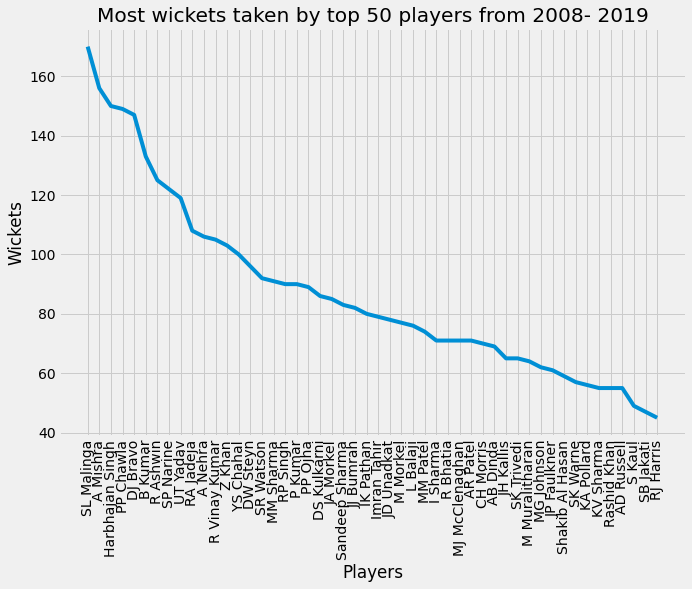

In [309]:
train1=train.groupby('Players').agg({'Wickets':np.sum}).sort_values('Wickets',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Wickets')
plt.title('Most wickets taken by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

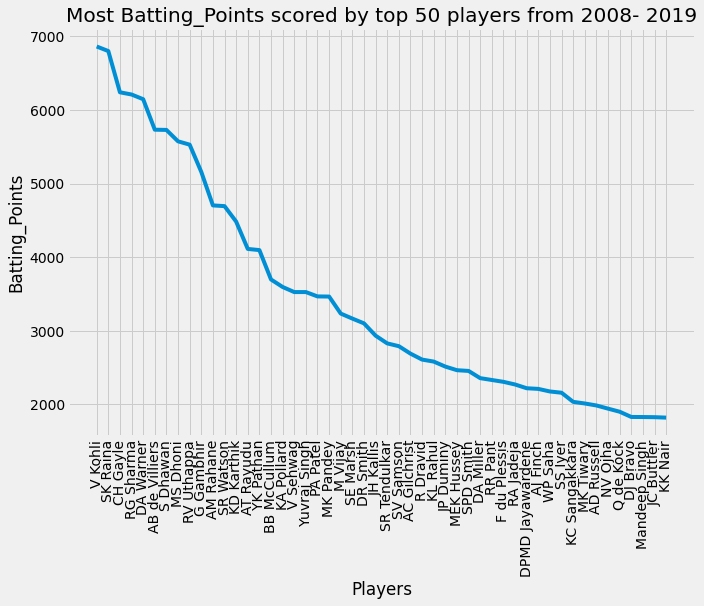

In [310]:
train1=train.groupby('Players').agg({'Batting_Points':np.sum}).sort_values('Batting_Points',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Batting_Points')
plt.title('Most Batting Points scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

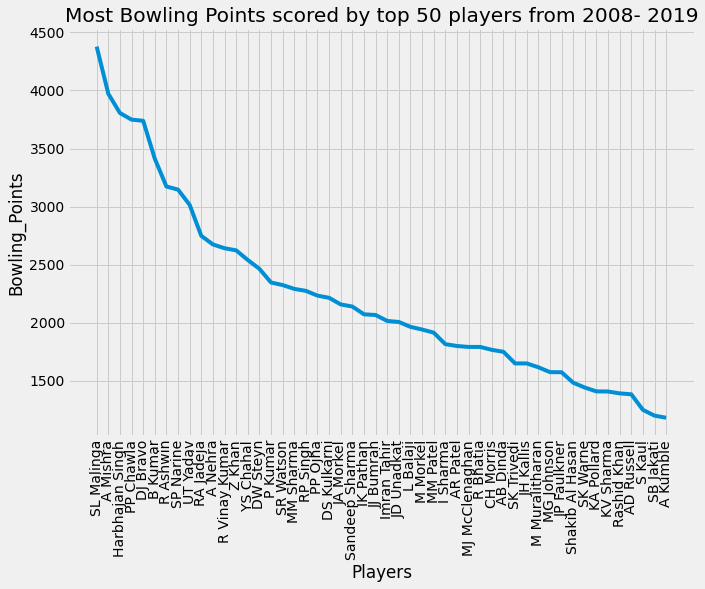

In [311]:
train1=train.groupby('Players').agg({'Bowling_Points':np.sum}).sort_values('Bowling_Points',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Bowling_Points')
plt.title('Most Bowling Points scored by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

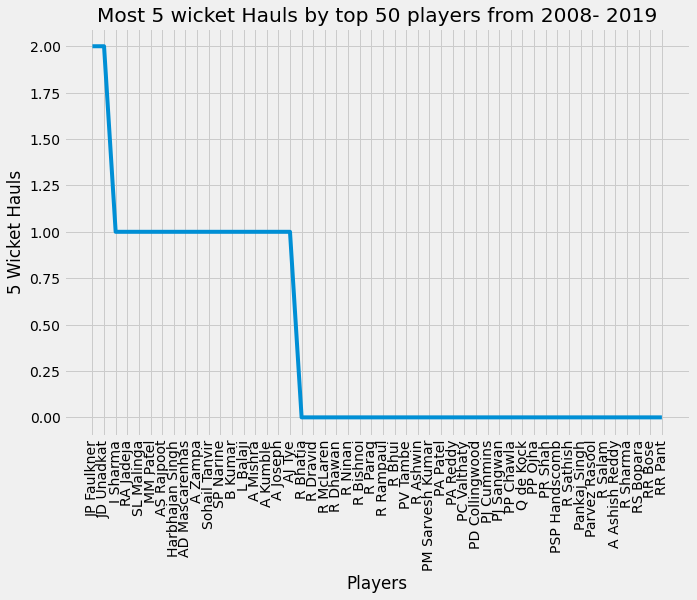

In [315]:
train1=train.groupby('Players').agg({'5W_Haul':np.sum}).sort_values('5W_Haul',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('5 Wicket Hauls')
plt.title('Most 5 wicket Hauls by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

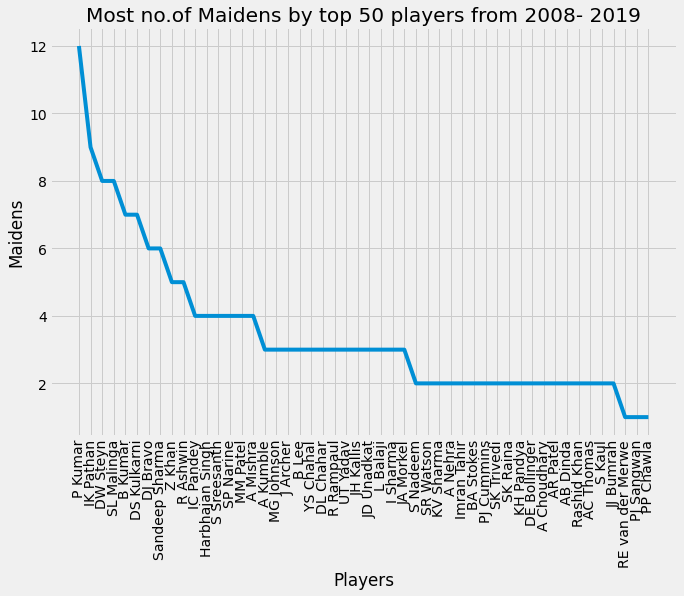

In [314]:
train1=train.groupby('Players').agg({'Maidens':np.sum}).sort_values('Maidens',ascending=False)
plt.figure(figsize=(10,7))
plt.xlabel('Players')
plt.ylabel('Maidens')
plt.title('Most no.of Maidens by top 50 players from 2008- 2019')
plt.xticks(rotation=90)
plt.plot(train1[:50])

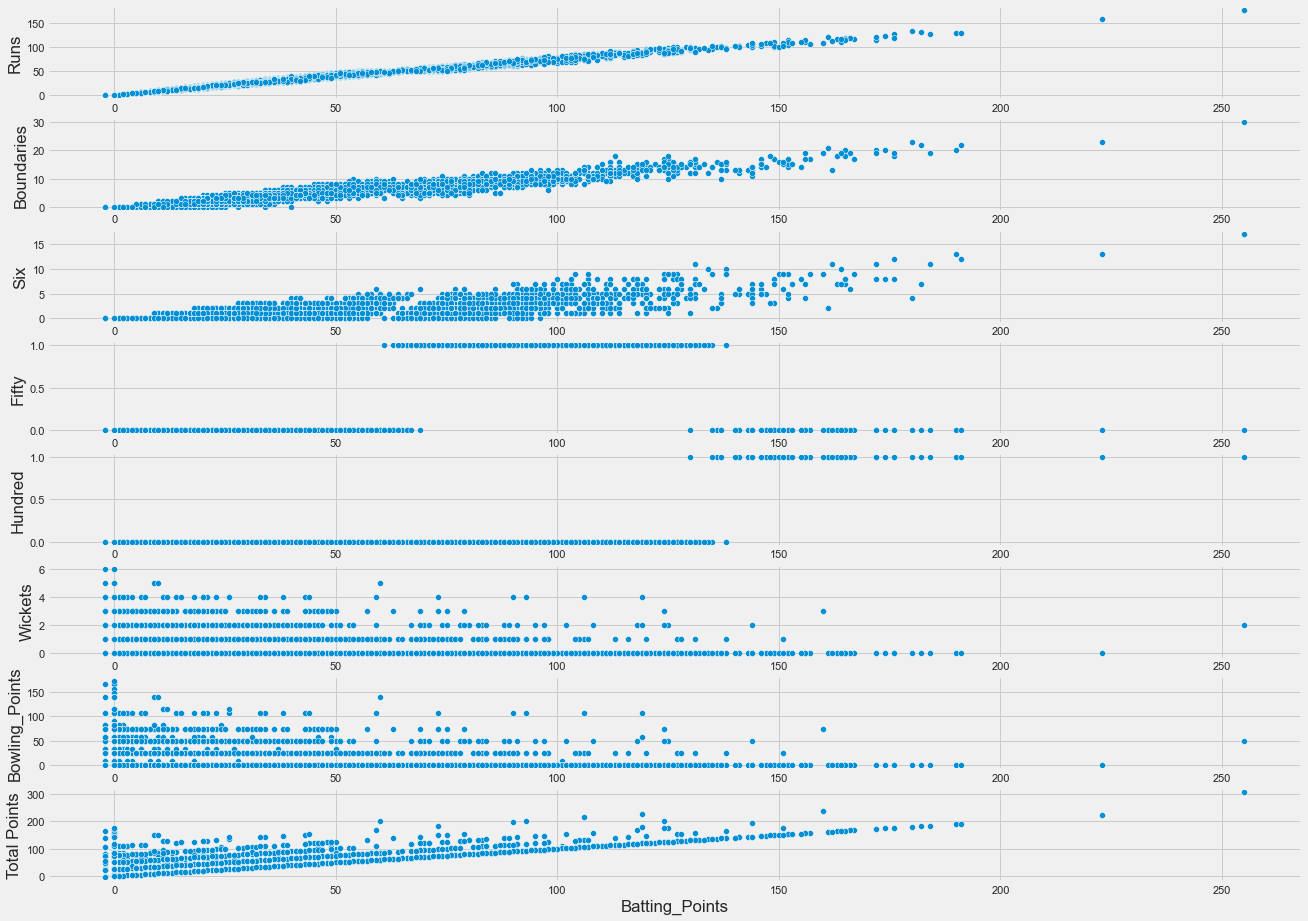

In [151]:
values=['Runs', 'Boundaries', 'Six', 'Fifty', 'Hundred', 'Wickets','Bowling_Points', 'Total Points']
fig,axes=plt.subplots(len(values),1,figsize=(20,15))
i=0
for value in values: 
    sns.scatterplot(x='Batting_Points',y=value,ax=axes[i],data=train)
    i+=1

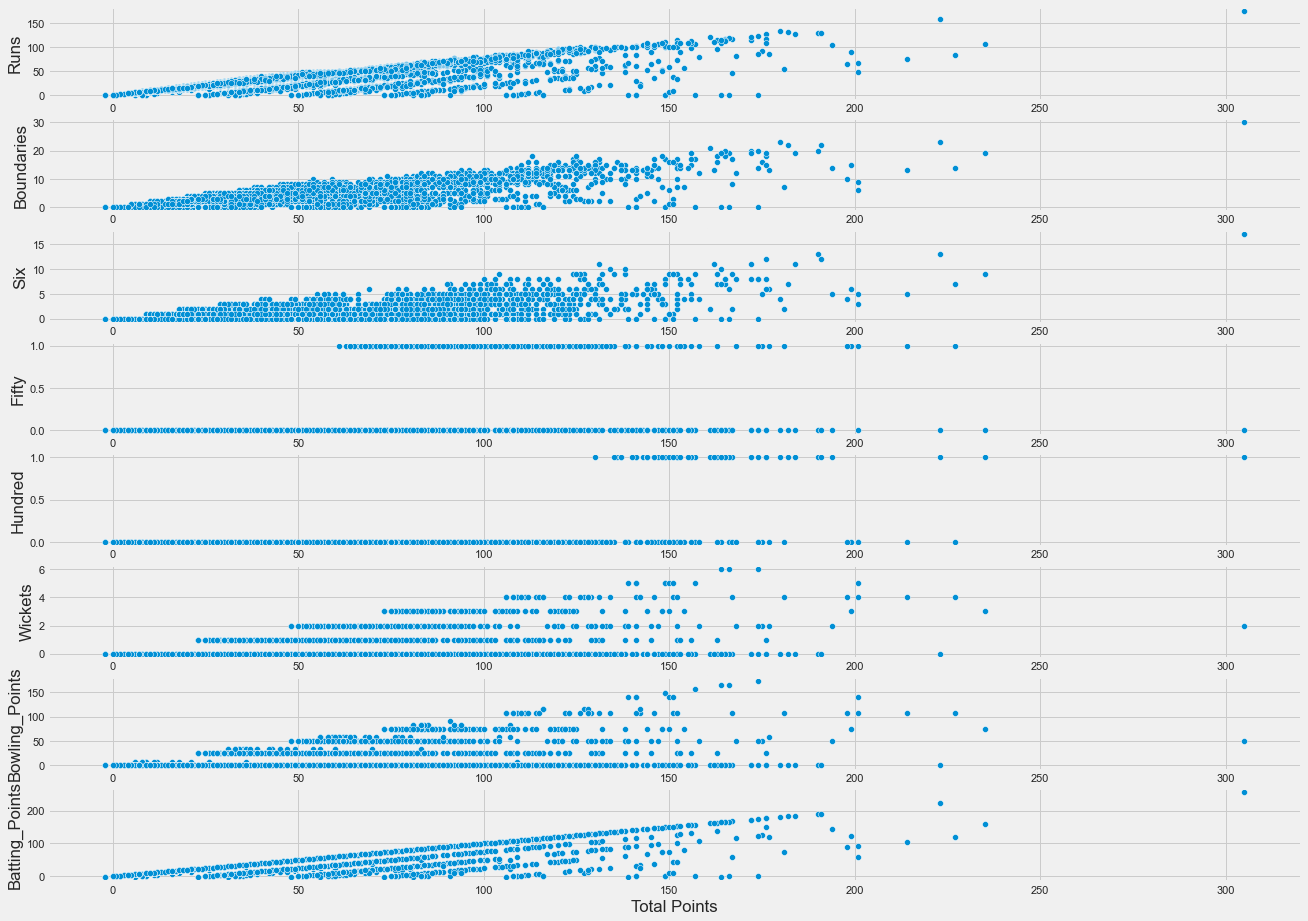

In [152]:
values=['Runs', 'Boundaries', 'Six', 'Fifty', 'Hundred', 'Wickets','Bowling_Points', 'Batting_Points']
fig,axes=plt.subplots(len(values),1,figsize=(20,15))
i=0
for value in values: 
    sns.scatterplot(x='Total Points',y=value,ax=axes[i],data=train)
    i+=1

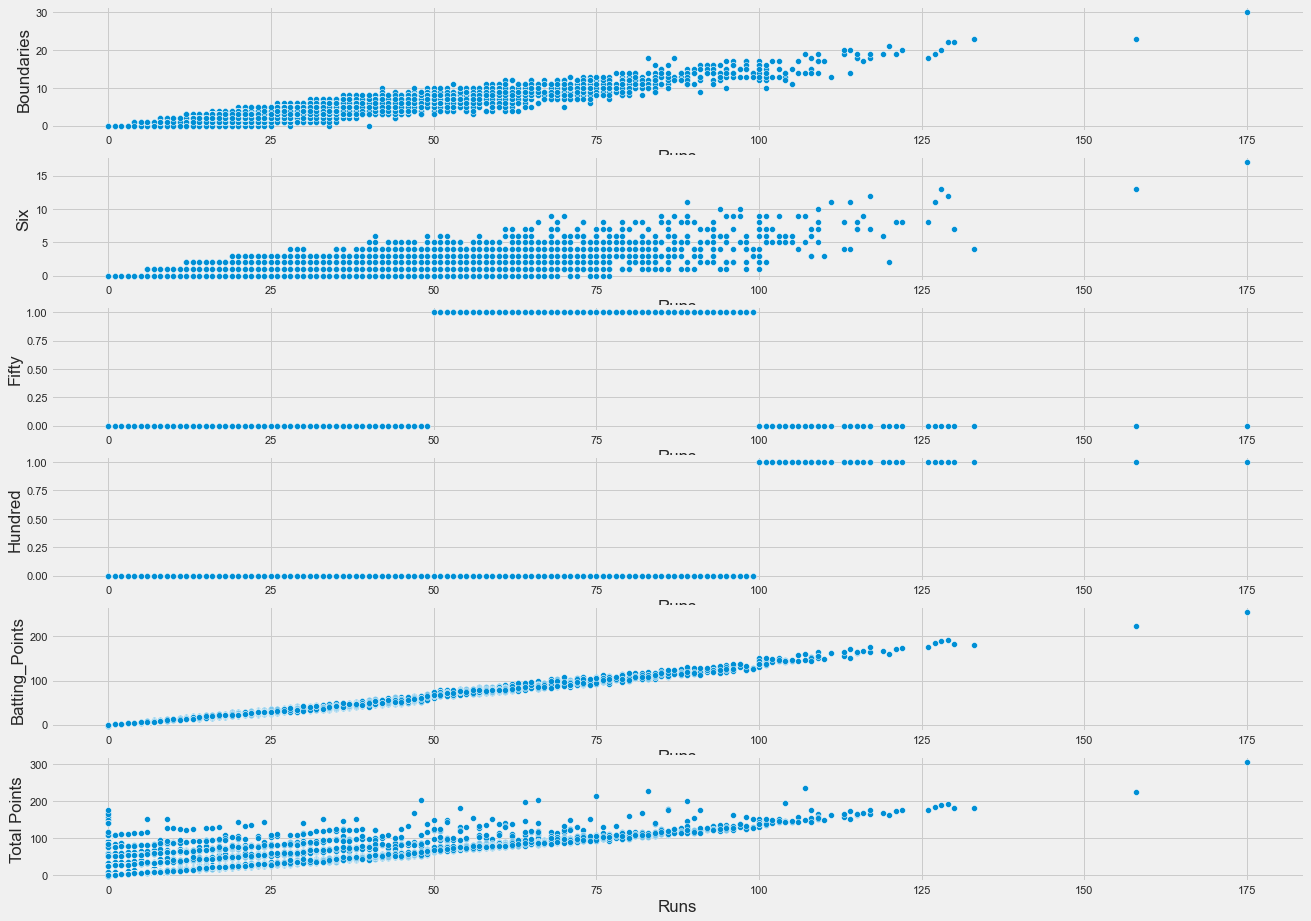

In [153]:
values=[ 'Boundaries', 'Six', 'Fifty', 'Hundred', 'Batting_Points','Total Points']
fig,axes=plt.subplots(len(values),1,figsize=(20,15))
i=0
for value in values: 
    sns.scatterplot(x='Runs',y=value,ax=axes[i],data=train)
    i+=1

<AxesSubplot:xlabel='Bowling_Points', ylabel='Wickets'>

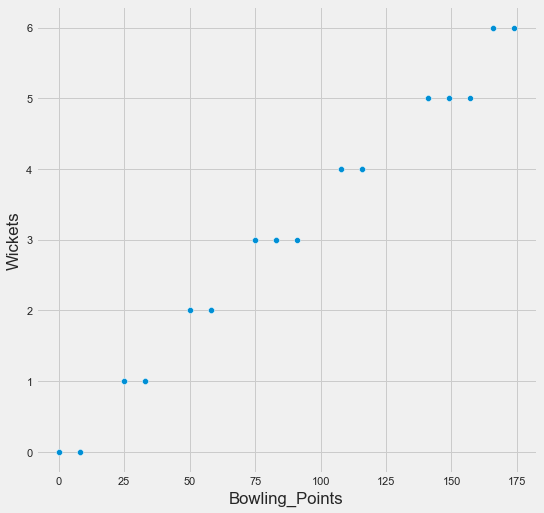

In [158]:
plt.figsize=(20,15)
sns.scatterplot(x='Bowling_Points',y='Wickets',data=train)

<AxesSubplot:>

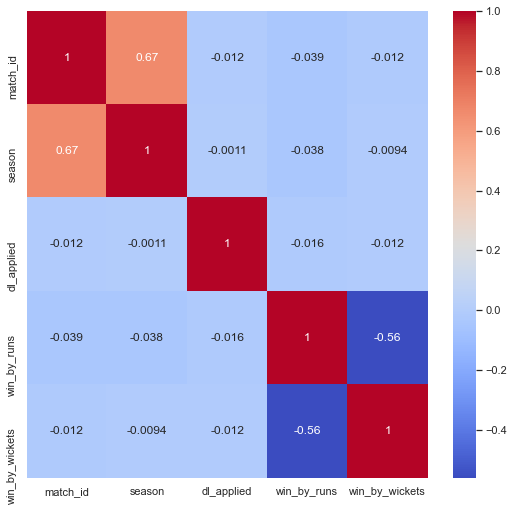

In [319]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (8,8)})
corr = past.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

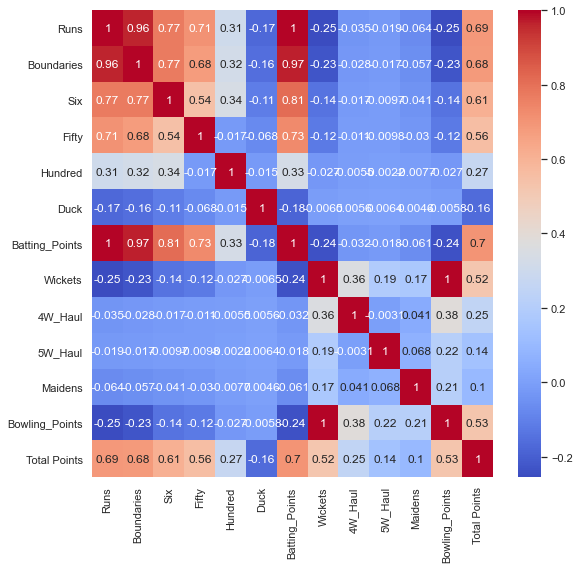

In [320]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (8,8)})
corr = train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Machine learning

In [73]:
train["match_id"]=train["Id"].str.split("_", n = 1, expand = True)[0]
train["Players"]=train["Id"].str.split("_", n = 1, expand = True)[1]
train.head()


Id  Runs  Boundaries  Six  Fifty  Hundred  Duck  \
0   1_Bipul Sharma     0           0    0      0        0     0   
1       1_DJ Hooda    16           1    1      0        0     0   
2      1_KM Jadhav    31           5    1      0        0     0   
3  1_Mandeep Singh    24           5    0      0        0     0   
4   1_Yuvraj Singh    62          10    3      1        0     0   

   Batting_Points  Wickets  4W_Haul  5W_Haul  Maidens  Bowling_Points  \
0               0        1        0        0        0              25   
1              19        1        0        0        0              25   
2              38        0        0        0        0               0   
3              29        0        0        0        0               0   
4              86        0        0        0        0               0   

   Total Points match_id        Players  
0            25        1   Bipul Sharma  
1            44        1       DJ Hooda  
2            38        1      KM Jadhav  
3            29        1  Mandeep Singh  
4            86        1   Yuvraj Singh

In [78]:
train_df=train[['Id', 'Players', 'Total Points', 'match_id']]
train_df['match_id']=train_df['match_id'].apply(lambda x:int(x))

In [79]:
test.head()

Id  Total Points
0      1216492_AS Yadav             0
1     1216492_AT Rayudu             0
2     1216492_DL Chahar             0
3  1216492_F du Plessis             0
4     1216492_HH Pandya             0

In [80]:
test["match_id"]=test["Id"].str.split("_", n = 1, expand = True)[0]
test["Players"]=test["Id"].str.split("_", n = 1, expand = True)[1]
test['match_id']=test['match_id'].apply(lambda x:int(x))
test.head()

Id  Total Points  match_id       Players
0      1216492_AS Yadav             0   1216492      AS Yadav
1     1216492_AT Rayudu             0   1216492     AT Rayudu
2     1216492_DL Chahar             0   1216492     DL Chahar
3  1216492_F du Plessis             0   1216492  F du Plessis
4     1216492_HH Pandya             0   1216492     HH Pandya

In [81]:
past=past[['match_id', 'team1', 'team2', 'season']]
past['match_id']=past['match_id'].apply(lambda x:int(x))
match=match[['match_id', 'team1', 'team2']]
match['match_id']=match['match_id'].apply(lambda x:int(x))

In [82]:
train_df = pd.merge(train_df,past, how = 'inner', on = 'match_id')

In [83]:
test = pd.merge(test,match, how = 'inner', on = 'match_id')

In [84]:
print('train_df shape:', train_df.shape)
print('test shape', test.shape)

train_df shape: (15916, 7)
test shape (1283, 6)


In [85]:
train_df.isnull().sum()

Id              0
Players         0
Total Points    0
match_id        0
team1           0
team2           0
season          0
dtype: int64

In [86]:
test.isnull().sum()

Id              0
Total Points    0
match_id        0
Players         0
team1           0
team2           0
dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [88]:
train_df.team1 = le.fit_transform(train_df.team1)
train_df.team2 = le.fit_transform(train_df.team2)

In [89]:
train_df.head()

Id        Players  Total Points  match_id  team1  team2  \
0   1_Bipul Sharma   Bipul Sharma            25         1     14     13   
1       1_DJ Hooda       DJ Hooda            44         1     14     13   
2      1_KM Jadhav      KM Jadhav            38         1     14     13   
3  1_Mandeep Singh  Mandeep Singh            29         1     14     13   
4   1_Yuvraj Singh   Yuvraj Singh            86         1     14     13   

   season  
0    2017  
1    2017  
2    2017  
3    2017  
4    2017

In [137]:
#  training the dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error
from sklearn.model_selection import cross_val_score
X=train_df[['team1', 'team2']]
y=train_df['Total Points']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

## Linear regression

In [112]:
model = LinearRegression(normalize=True)
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [113]:
#model prediction
predictions=model.predict(x_test)
print('Intercept:',model.intercept_)
print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

Intercept: 29.750843086021003
Coefficient: [ 0.59792681 -0.19121107]
[30.13522461 29.81068059 30.02422588 ... 29.61426375 29.75257834
 30.21219056]
5509     25
5411     20
4492     21
14385    53
3265     25
         ..
13844    27
14404    73
11809    94
6747     75
9634     50
Name: Total Points, Length: 3184, dtype: int64


In [114]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  883.1759
RMSE:  29.7183
MAE:  22.8844
CV Score: 883.5260388005341


## Lasso Regression

In [115]:
model = Lasso()
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [116]:
#model prediction
predictions=model.predict(x_test)
print('Intercept:',model.intercept_)
print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

Intercept: 29.951775054979578
Coefficient: [ 0. -0.]
[29.95177505 29.95177505 29.95177505 ... 29.95177505 29.95177505
 29.95177505]
5509     25
5411     20
4492     21
14385    53
3265     25
         ..
13844    27
14404    73
11809    94
6747     75
9634     50
Name: Total Points, Length: 3184, dtype: int64


In [117]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  883.0949
RMSE:  29.7169
MAE:  22.8812
CV Score: 883.0283534495542


## Ridge Regression

In [118]:
model = Ridge(normalize=True)
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [119]:
#model prediction
predictions=model.predict(x_test)
print('Intercept:',model.intercept_)
print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

Intercept: 29.857493210747982
Coefficient: [ 0.3030252  -0.11208886]
[30.05229512 29.88239545 29.99061873 ... 29.77742974 29.85511883
 30.08045494]
5509     25
5411     20
4492     21
14385    53
3265     25
         ..
13844    27
14404    73
11809    94
6747     75
9634     50
Name: Total Points, Length: 3184, dtype: int64


In [120]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  883.1219
RMSE:  29.7174
MAE:  22.8826
CV Score: 883.2011689201192


##  Decision tree regressor

In [121]:
model = DecisionTreeRegressor()
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [125]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[32.17647059 27.8423913  30.49006623 ... 29.80392157 29.30534351
 29.98      ]
5509     25
5411     20
4492     21
14385    53
3265     25
         ..
13844    27
14404    73
11809    94
6747     75
9634     50
Name: Total Points, Length: 3184, dtype: int64


In [126]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  896.5765
RMSE:  29.9429
MAE:  23.0658
CV Score: 939.7877941927103


## Random Forest Regressor

In [127]:
model = RandomForestRegressor()
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [128]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[32.30495556 27.95077408 30.37025124 ... 29.87561053 29.70722036
 30.37331638]
5509     25
5411     20
4492     21
14385    53
3265     25
         ..
13844    27
14404    73
11809    94
6747     75
9634     50
Name: Total Points, Length: 3184, dtype: int64


In [129]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  896.6119
RMSE:  29.9435
MAE:  23.0697
CV Score: 936.2011846049993


## Extra trees Regressor

In [130]:
model = ExtraTreesRegressor()
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [131]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[32.17647059 27.8423913  30.49006623 ... 29.80392157 29.30534351
 29.98      ]
5509     25
5411     20
4492     21
14385    53
3265     25
         ..
13844    27
14404    73
11809    94
6747     75
9634     50
Name: Total Points, Length: 3184, dtype: int64


In [132]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  896.5765
RMSE:  29.9429
MAE:  23.0658
CV Score: 939.5103980575137


## Support vector regressor

In [133]:
model=SVR()
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [134]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[24.9216685  24.89608921 24.9015076  ... 24.90001422 24.89985197
 24.88682128]
5509     25
5411     20
4492     21
14385    53
3265     25
         ..
13844    27
14404    73
11809    94
6747     75
9634     50
Name: Total Points, Length: 3184, dtype: int64


In [135]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  916.3052
RMSE:  30.2705
MAE:  22.0198
CV Score: 915.872201304281


##  AdaBoost Regressor

In [138]:
model= AdaBoostRegressor()
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [139]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[39.10540319 39.10540319 39.10540319 ... 39.10540319 39.10540319
 39.10540319]
9244      0
1629     32
13601    37
348      25
15729    29
         ..
9237     25
14908    26
11346    28
3194     14
1474     57
Name: Total Points, Length: 3184, dtype: int64


In [140]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  981.8252
RMSE:  31.3341
MAE:  25.8839
CV Score: 955.062211621122


## Gradient Boosting Regressor

In [141]:
model= GradientBoostingRegressor()
#model training
model.fit(x_train,y_train)
min_max_scaler = preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.transform(x_test)
print(len(x_train),len(x_test))

12732 3184


In [142]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[30.21633602 28.95158396 30.83675851 ... 29.79943359 30.13402848
 27.93811536]
9244      0
1629     32
13601    37
348      25
15729    29
         ..
9237     25
14908    26
11346    28
3194     14
1474     57
Name: Total Points, Length: 3184, dtype: int64


In [143]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

MSE:  910.9053
RMSE:  30.1812
MAE:  23.0725
CV Score: 925.9526048180718
